<a href="https://colab.research.google.com/github/Legend17935/Cycle-Analysis/blob/main/Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# Install necessary packages if not already installed
if(!require(readr)){install.packages("readr")}

# Try to read the CSV file
tryCatch({
  df <- read_csv("Unemployment in America Per US State.csv")
  head(df) # Display the first few rows
},
error = function(e) {
  if(grepl("cannot open the connection", e$message)){
    message("Error: 'Unemployment in America Per US State.csv' not found.")
  } else {
    message(paste("An error occurred:", e$message))
  }
  df <<- NULL # Assign NULL to df in the parent environment
},
warning = function(w){
  message(paste("A warning occurred:", w$message))
})

Loading required package: readr

Rows: 29892 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): FIPS Code, State/Area, Month
dbl (4): Year, Percent (%) of State/Area's Population, Percent (%) of Labor ...
num (4): Total Civilian Non-Institutional Population in State/Area, Total Ci...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01,Alabama,1976,01,2605000,1484555,57.0,1386023,53.2,98532,6.6
02,Alaska,1976,01,232000,160183,69.0,148820,64.1,11363,7.1
04,Arizona,1976,01,1621000,964120,59.5,865871,53.4,98249,10.2
05,Arkansas,1976,01,1536000,889044,57.9,824395,53.7,64649,7.3
06,California,1976,01,15621000,9774280,62.6,8875685,56.8,898595,9.2
037,Los Angeles County,1976,01,5273000,3381856,64.1,3081806,58.4,300050,8.9


In [ ]:

if (!is.null(df)) {
  print(paste("Data Shape:", dim(df)[1], "rows,", dim(df)[2], "columns"))
  print("\nData Types:")
  print(sapply(df, class))
}

[1] "Data Shape: 29892 rows, 11 columns"
[1] "\nData Types:"
                                                FIPS Code 
                                              "character" 
                                               State/Area 
                                              "character" 
                                                     Year 
                                                "numeric" 
                                                    Month 
                                                "numeric" 
Total Civilian Non-Institutional Population in State/Area 
                                                "numeric" 
                 Total Civilian Labor Force in State/Area 
                                                "numeric" 
                   Percent (%) of State/Area's Population 
                                                "numeric" 
                           Total Employment in State/Area 
                                                "numer

In [ ]:

if (!is.null(df)) {

  # Descriptive Statistics
  numerical_cols <- c("Year", "Month",
                      "Total Civilian Non-Institutional Population in State/Area",
                      "Total Civilian Labor Force in State/Area",
                      "Percent (%) of State/Area's Population",
                      "Total Employment in State/Area",
                      "Percent (%) of Labor Force Employed in State/Area",
                      "Total Unemployment in State/Area",
                      "Percent (%) of Labor Force Unemployed in State/Area")

  # Convert relevant columns to numeric, coercing errors to NA
  for (col in numerical_cols) {
    if (class(df[[col]]) == "character") {
      df[[col]] <- as.numeric(gsub(",", "", df[[col]]))
    }
  }


}

In [ ]:
  print("\nDescriptive Statistics:")
  print(summary(df[, numerical_cols]))

[1] "\nDescriptive Statistics:"
      Year          Month      
 Min.   :1976   Min.   : 1.00  
 1st Qu.:1987   1st Qu.: 3.75  
 Median :1999   Median : 6.50  
 Mean   :1999   Mean   : 6.50  
 3rd Qu.:2011   3rd Qu.: 9.25  
 Max.   :2022   Max.   :12.00  
 Total Civilian Non-Institutional Population in State/Area
 Min.   :  232000                                         
 1st Qu.: 1103986                                         
 Median : 2934918                                         
 Mean   : 4235528                                         
 3rd Qu.: 5390502                                         
 Max.   :31236439                                         
 Total Civilian Labor Force in State/Area
 Min.   :  160022                        
 1st Qu.:  731894                        
 Median : 1878042                        
 Mean   : 2734826                        
 3rd Qu.: 3417254                        
 Max.   :19600700                        
 Percent (%) of State/Area's Populati

In [ ]:

  # Missing Values
  print("\nMissing Values per column:")
  print(colSums(is.na(df)))

[1] "\nMissing Values per column:"
                                                FIPS Code 
                                                        0 
                                               State/Area 
                                                        0 
                                                     Year 
                                                        0 
                                                    Month 
                                                        0 
Total Civilian Non-Institutional Population in State/Area 
                                                        0 
                 Total Civilian Labor Force in State/Area 
                                                        0 
                   Percent (%) of State/Area's Population 
                                                        0 
                           Total Employment in State/Area 
                                                        0 
        Percent (%) o

In [ ]:



  # Initial Outlier Detection (based on min/max values in summary())
  print("\nPotential Outliers (based on min/max in summary()):")
  for (col in numerical_cols) {
    if (!is.character(df[[col]])) {
      min_val <- min(df[[col]], na.rm = TRUE)
      max_val <- max(df[[col]], na.rm = TRUE)
      print(paste0("Column '", col, "': Min = ", min_val, ", Max = ", max_val))
    }
  }

[1] "\nPotential Outliers (based on min/max in summary()):"
[1] "Column 'Year': Min = 1976, Max = 2022"
[1] "Column 'Month': Min = 1, Max = 12"
[1] "Column 'Total Civilian Non-Institutional Population in State/Area': Min = 232000, Max = 31236439"
[1] "Column 'Total Civilian Labor Force in State/Area': Min = 160022, Max = 19600700"
[1] "Column 'Percent (%) of State/Area's Population': Min = 51, Max = 75.7"
[1] "Column 'Total Employment in State/Area': Min = 148718, Max = 18754316"
[1] "Column 'Percent (%) of Labor Force Employed in State/Area': Min = 41.6, Max = 73.1"
[1] "Column 'Total Unemployment in State/Area': Min = 4980, Max = 3018611"
[1] "Column 'Percent (%) of Labor Force Unemployed in State/Area': Min = 1.9, Max = 30.6"


In [ ]:
# Calculate the average unemployment rate for each state
state_avg_unemployment <- aggregate(`Percent (%) of Labor Force Unemployed in State/Area` ~ `State/Area`, data = df, FUN = mean)
colnames(state_avg_unemployment) <- c("State", "AvgUnemployment")

# Identify states with the highest and lowest average unemployment rates
highest_unemployment <- state_avg_unemployment[which.max(state_avg_unemployment$AvgUnemployment), ]
lowest_unemployment <- state_avg_unemployment[which.min(state_avg_unemployment$AvgUnemployment), ]

print("State with highest average unemployment:")
print(highest_unemployment)

print("\nState with lowest average unemployment:")
print(lowest_unemployment)

[1] "State with highest average unemployment:"
           State AvgUnemployment
51 West Virginia        7.970213
[1] "\nState with lowest average unemployment:"
      State AvgUnemployment
29 Nebraska        3.444149


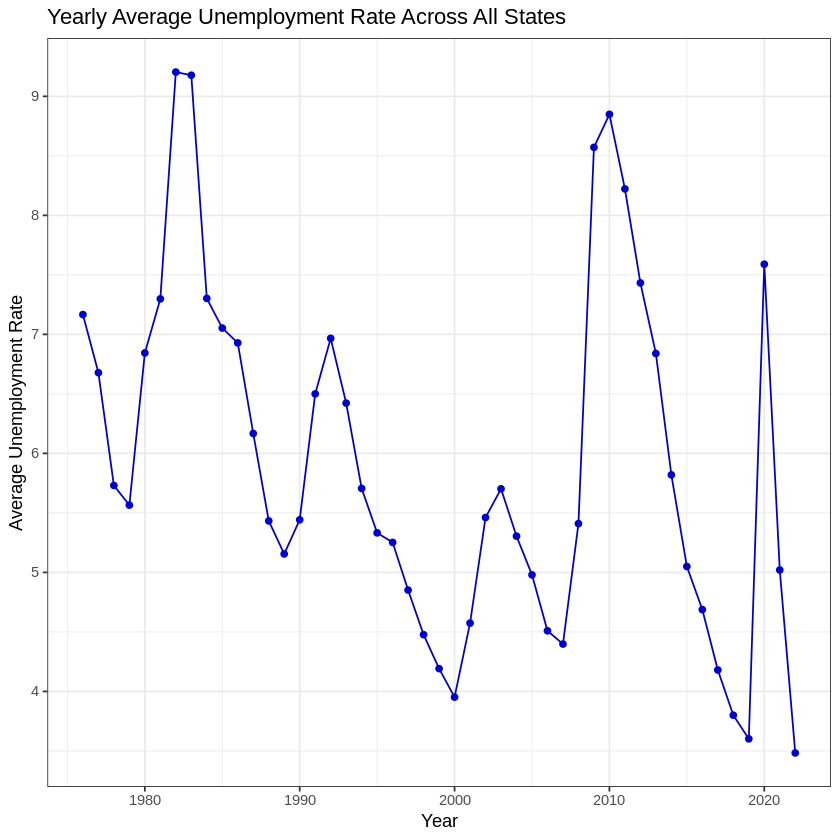

In [ ]:
# Analyze trends in unemployment rates over time
yearly_avg_unemployment <- aggregate(`Percent (%) of Labor Force Unemployed in State/Area` ~ Year, data = df, FUN = mean)

# Plotting with ggplot2
library(ggplot2)

ggplot(yearly_avg_unemployment, aes(x = Year, y = `Percent (%) of Labor Force Unemployed in State/Area`)) +
  geom_line(color = "mediumblue") +
  geom_point(color = "mediumblue") +
  labs(x = "Year", y = "Average Unemployment Rate", title = "Yearly Average Unemployment Rate Across All States") +
  theme_bw()



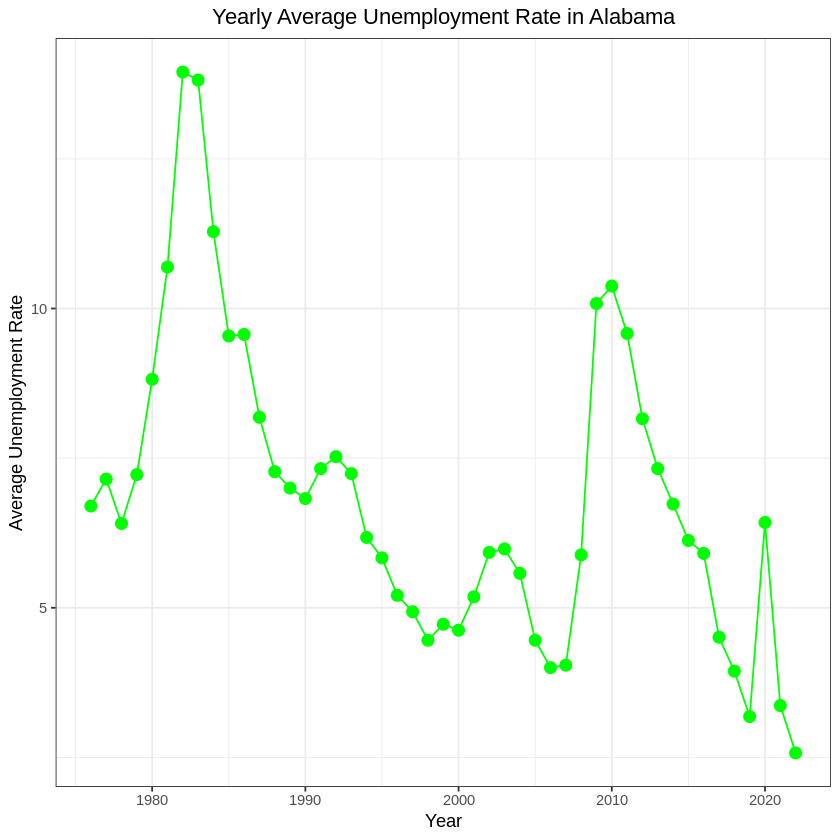

In [ ]:

alabama_unemployment <- df[df$`State/Area` == "Alabama", ]
alabama_unemployment <- aggregate(`Percent (%) of Labor Force Unemployed in State/Area` ~ Year, data = alabama_unemployment, FUN = mean)

# Plotting with ggplot2
library(ggplot2)

ggplot(alabama_unemployment, aes(x = Year, y = `Percent (%) of Labor Force Unemployed in State/Area`)) +
  geom_line(color = "green") +
  geom_point(color = "green", size = 3) +
  labs(x = "Year", y = "Average Unemployment Rate", title = "Yearly Average Unemployment Rate in Alabama") +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5)) # Center the title

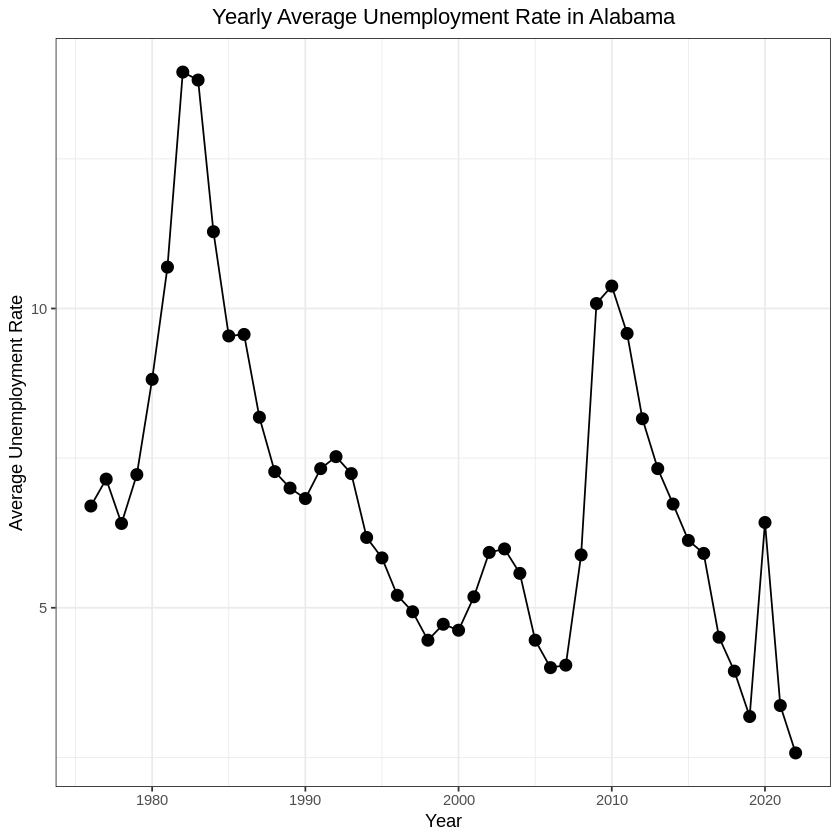

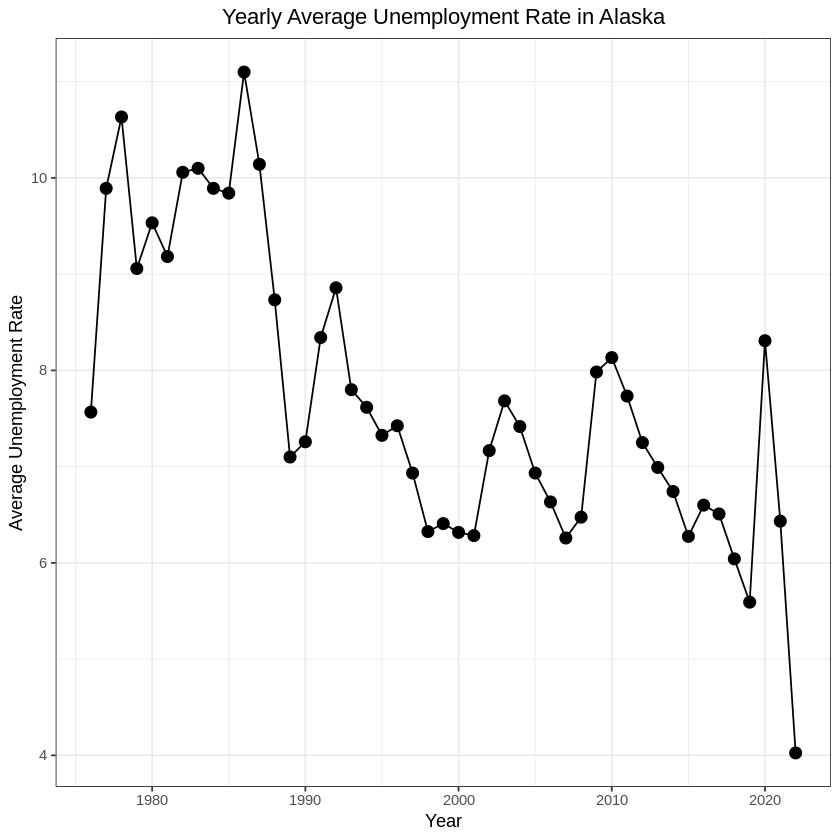

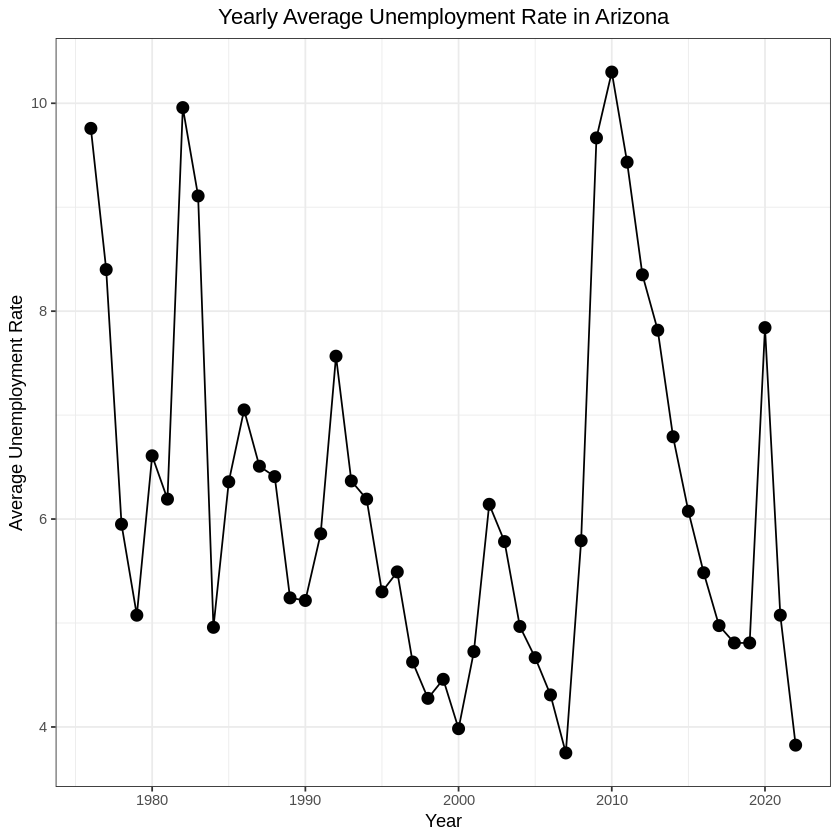

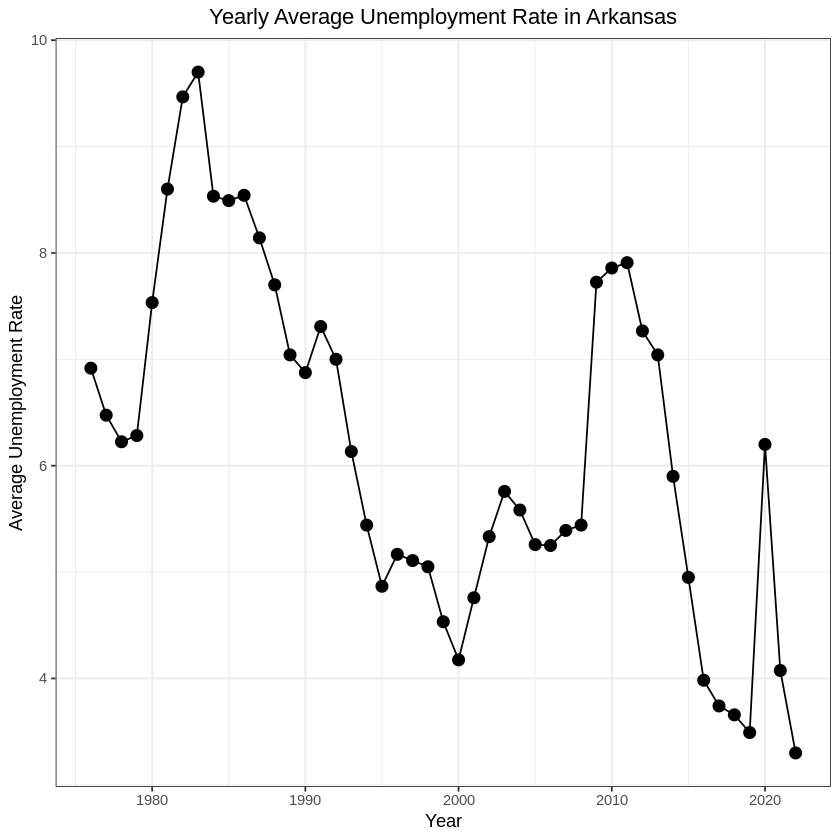

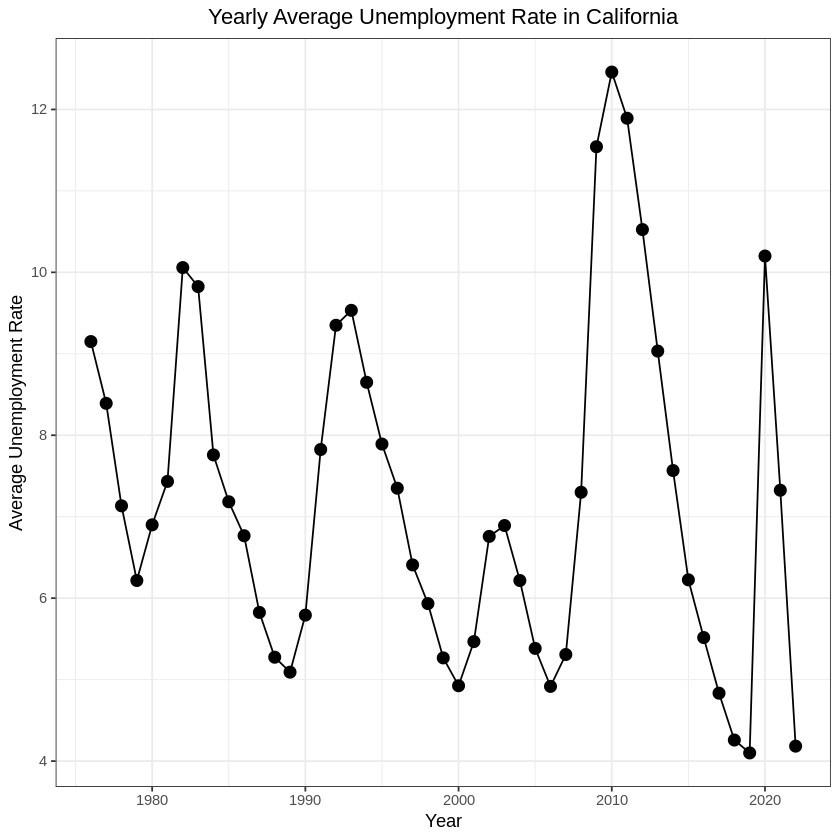

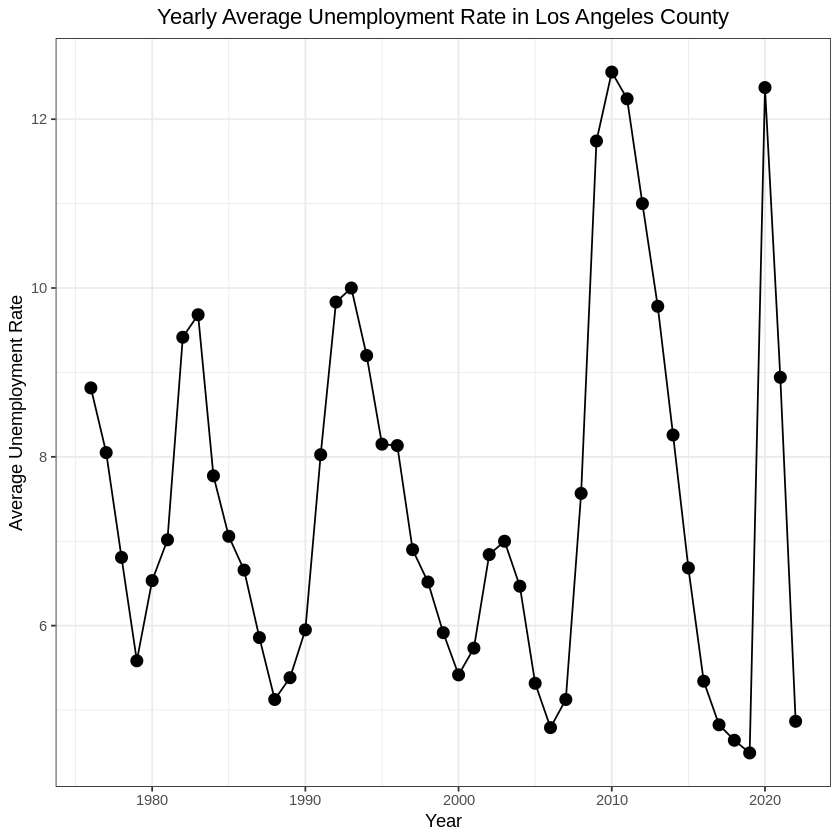

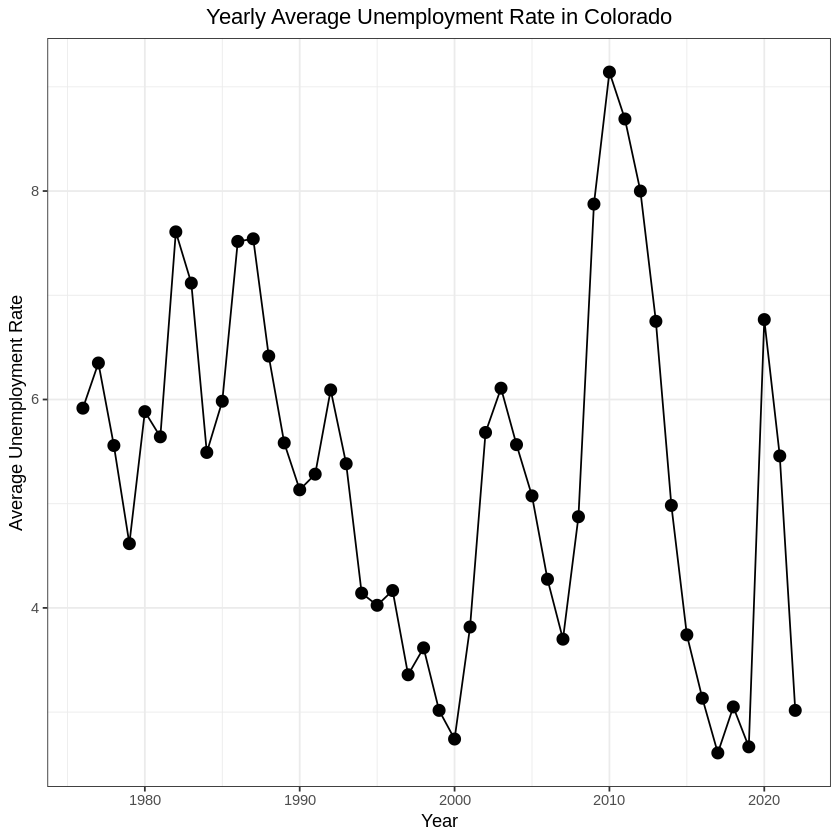

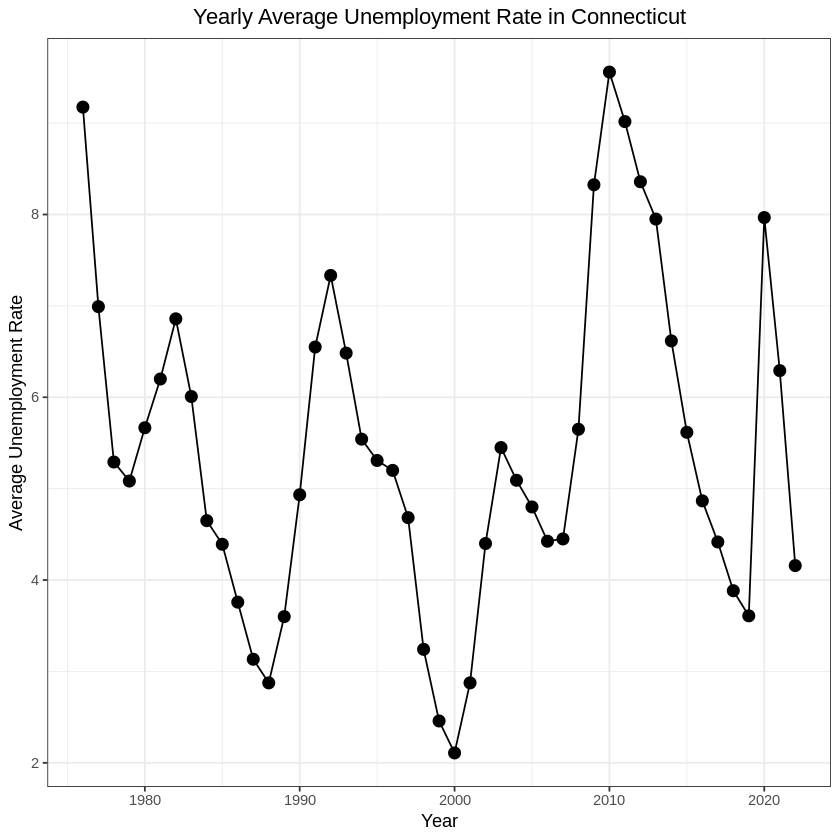

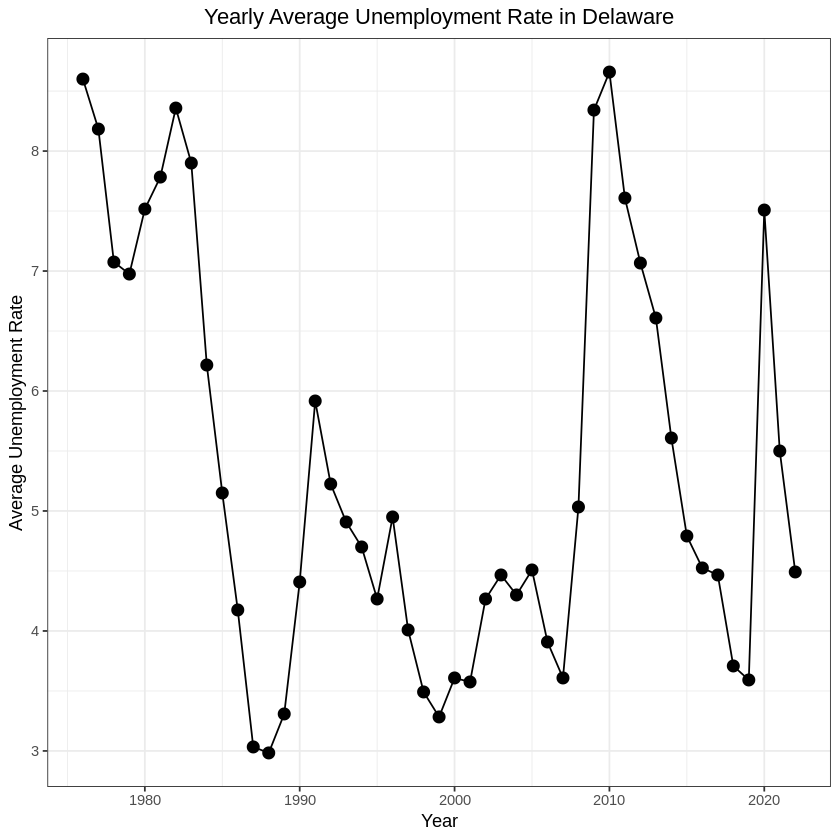

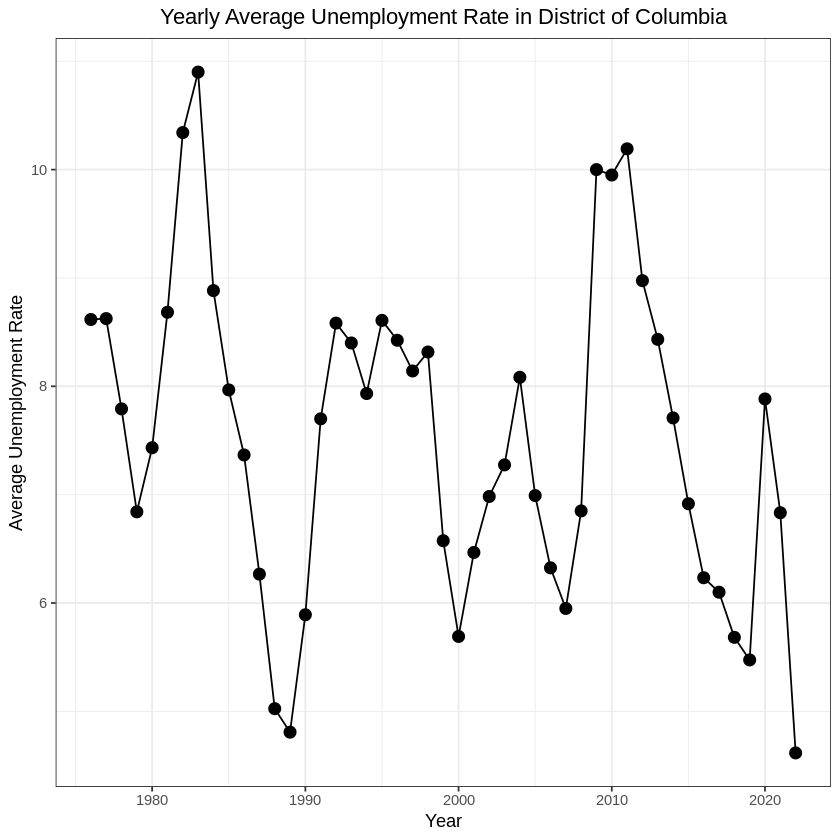

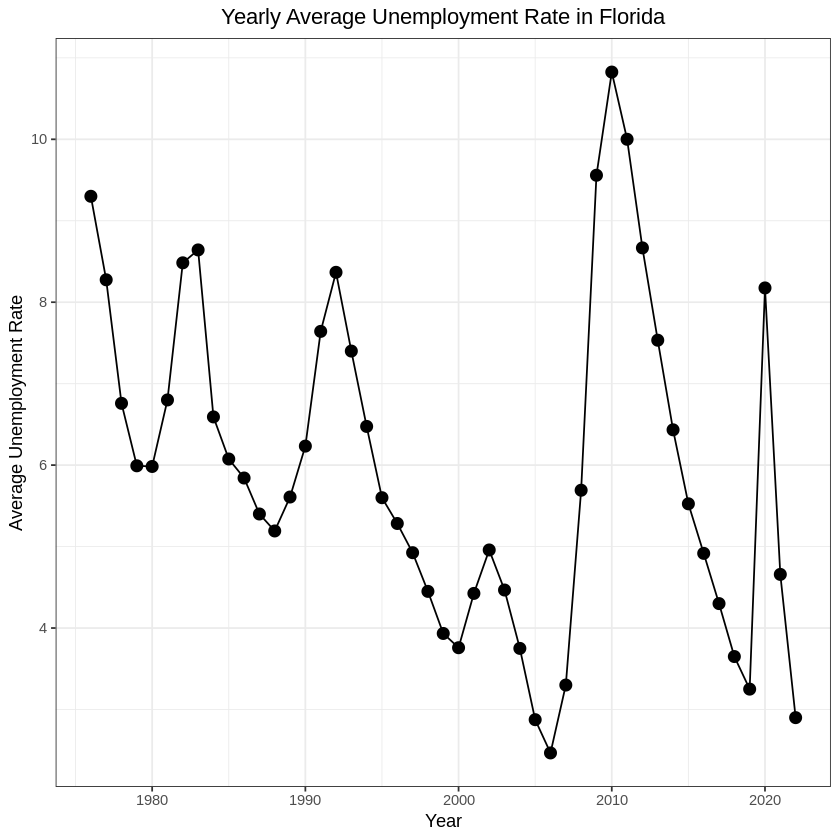

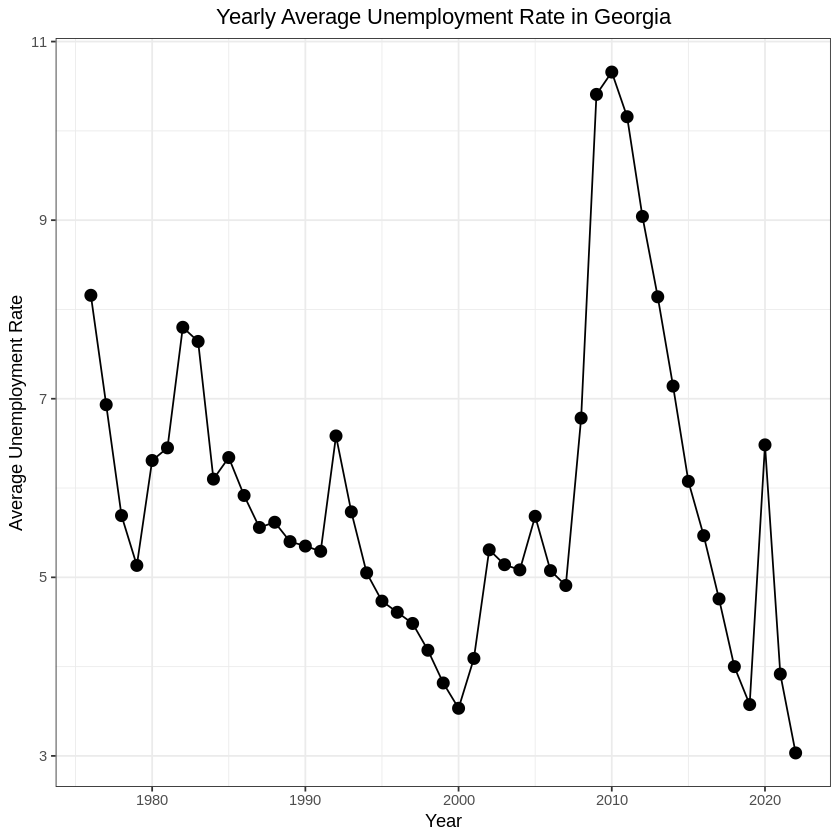

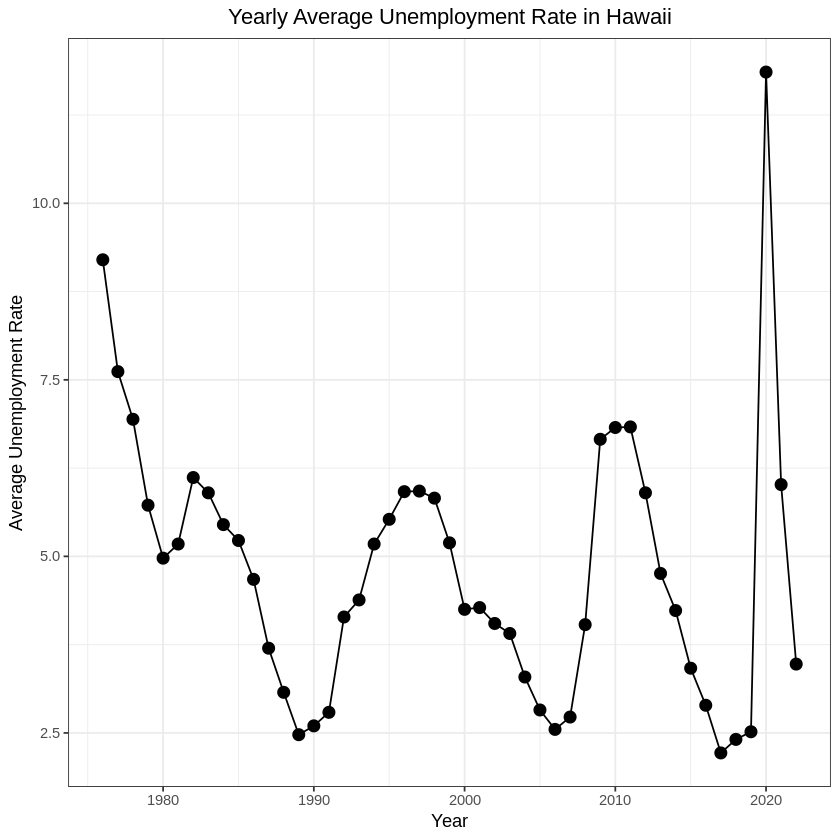

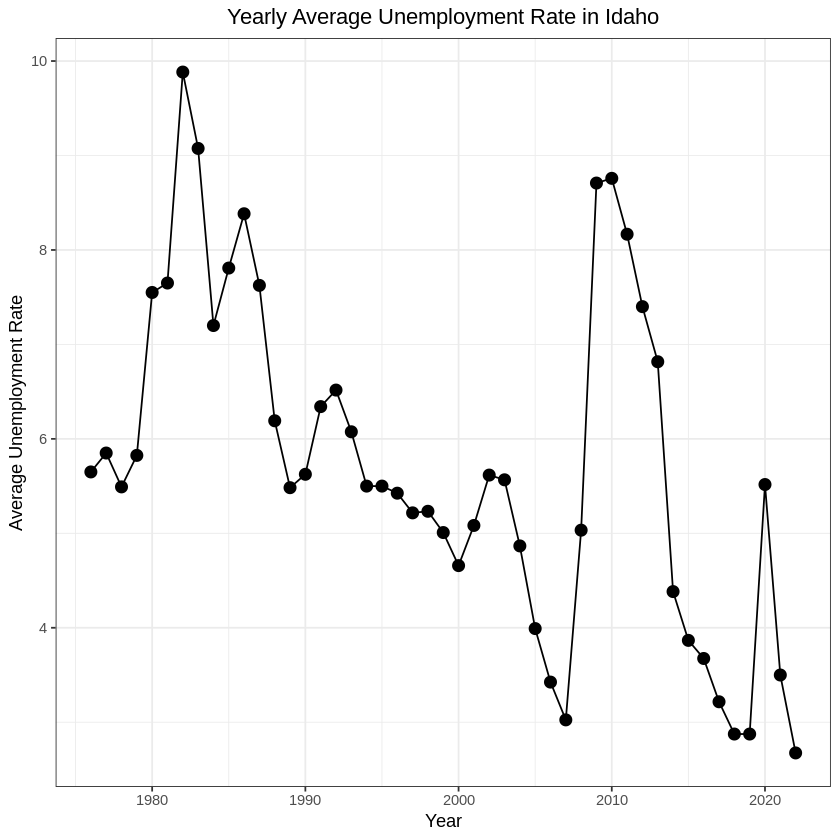

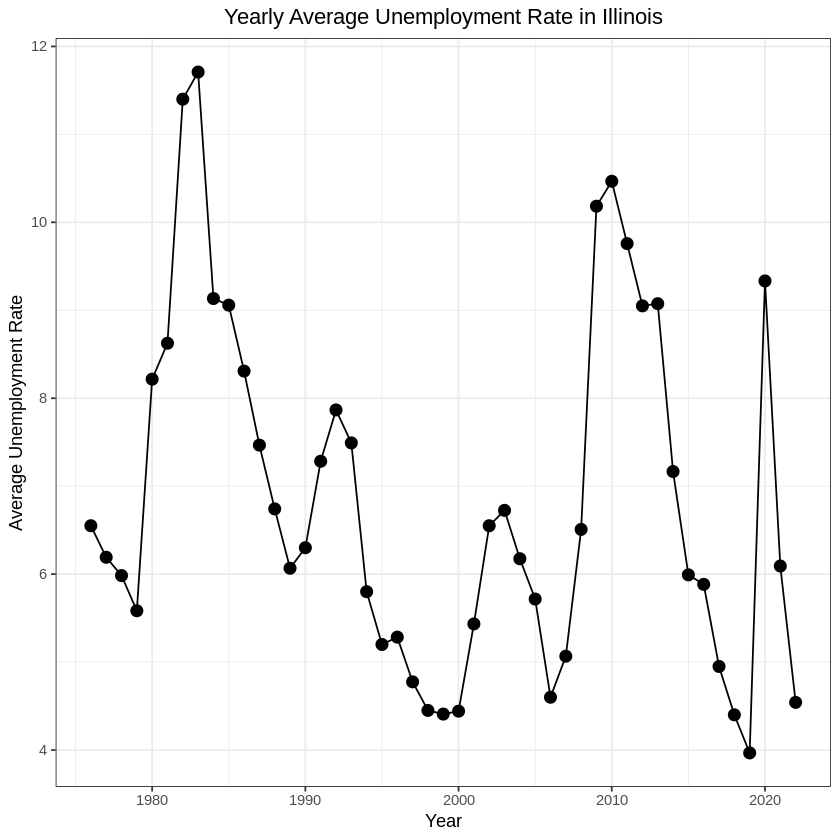

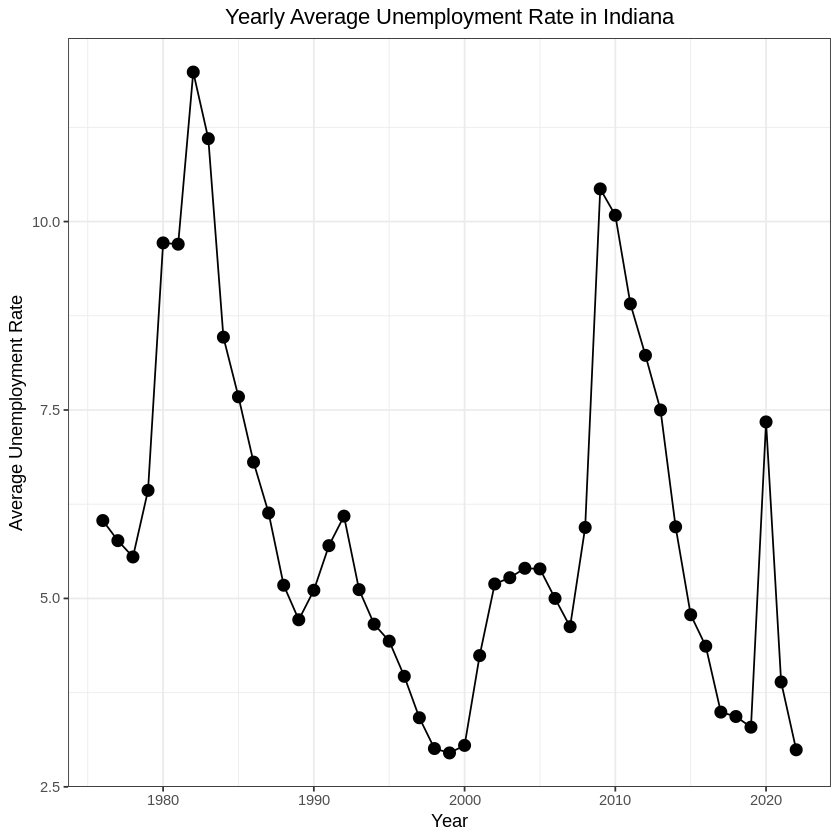

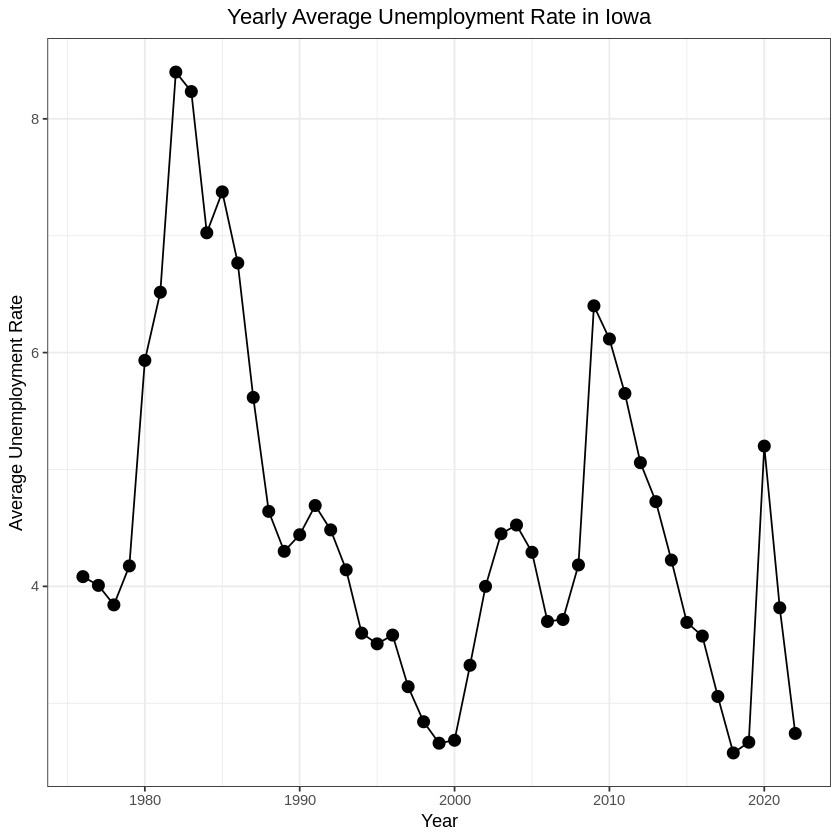

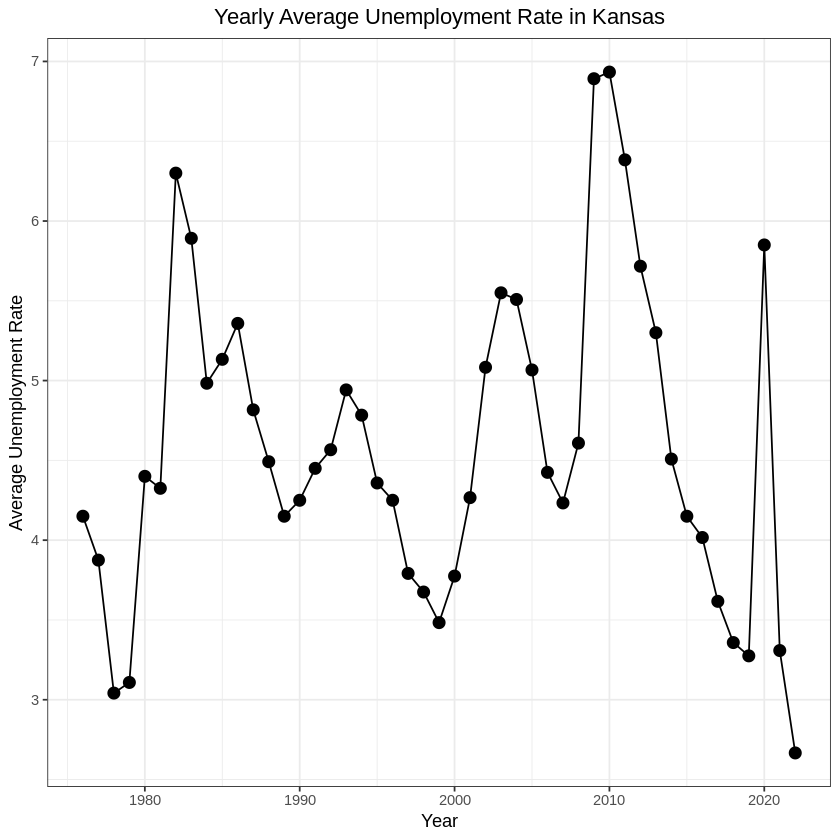

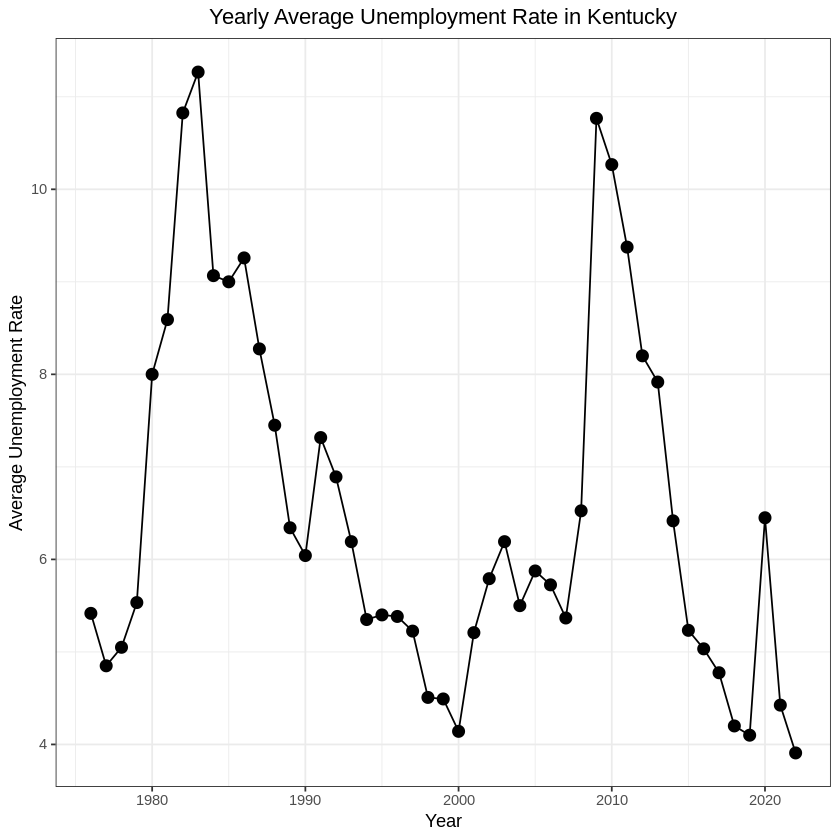

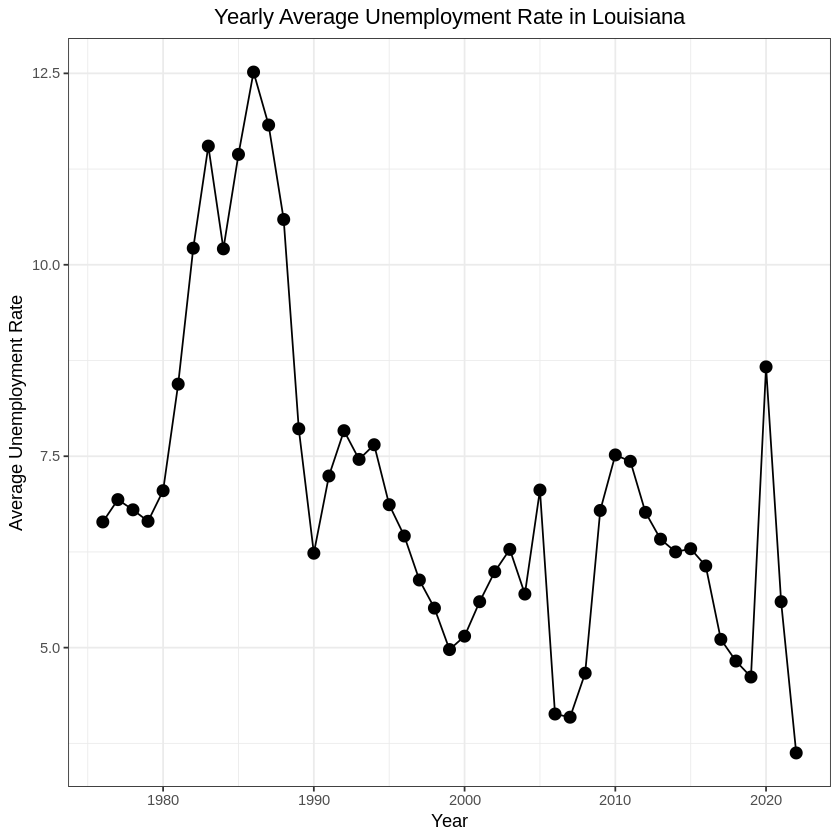

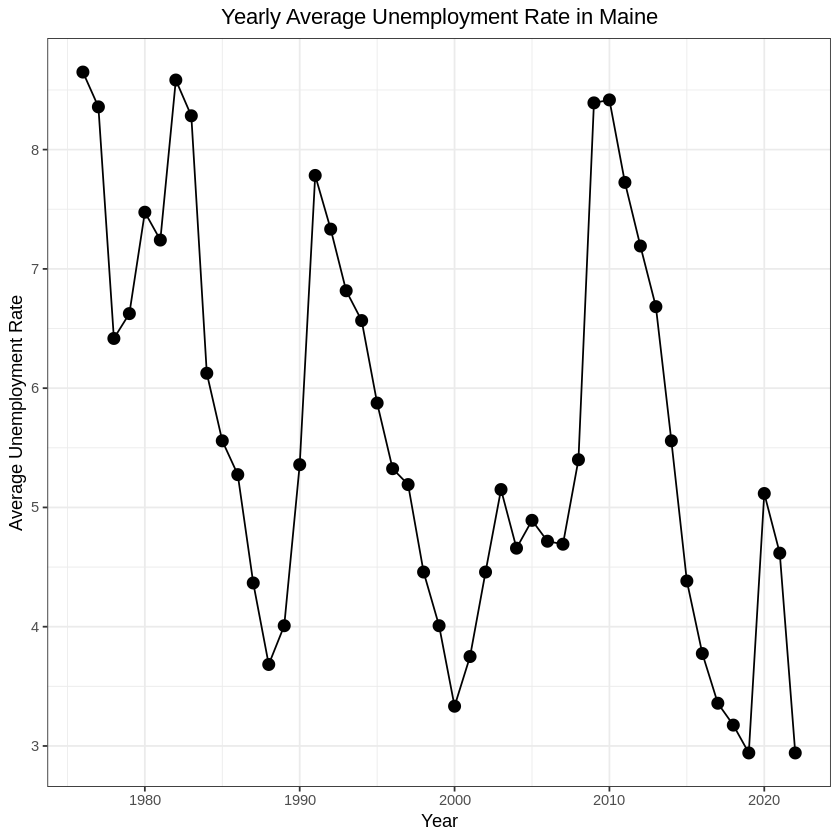

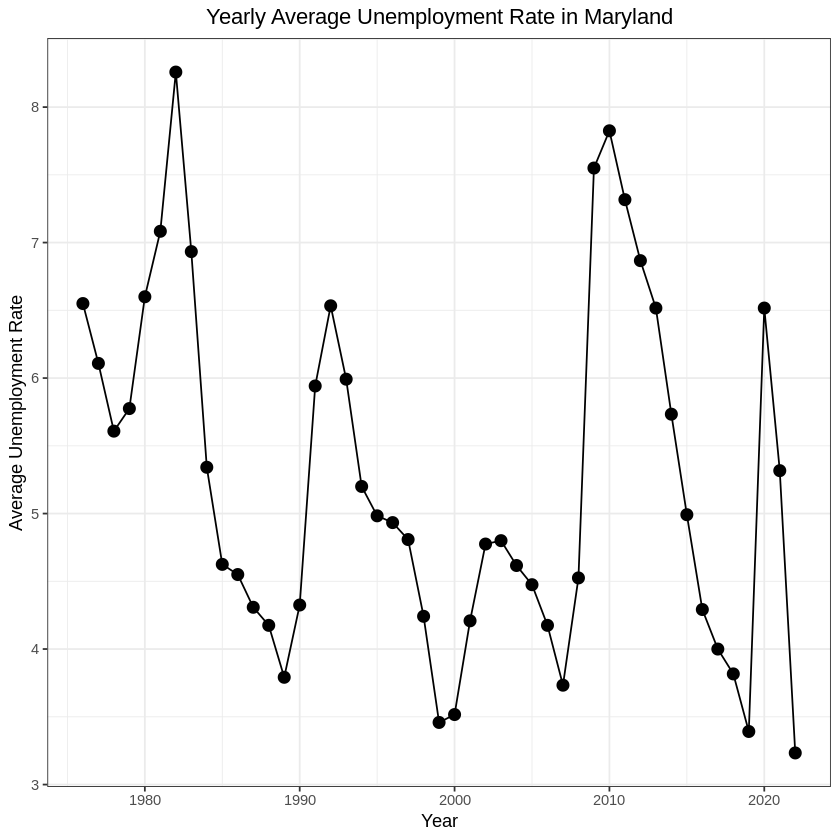

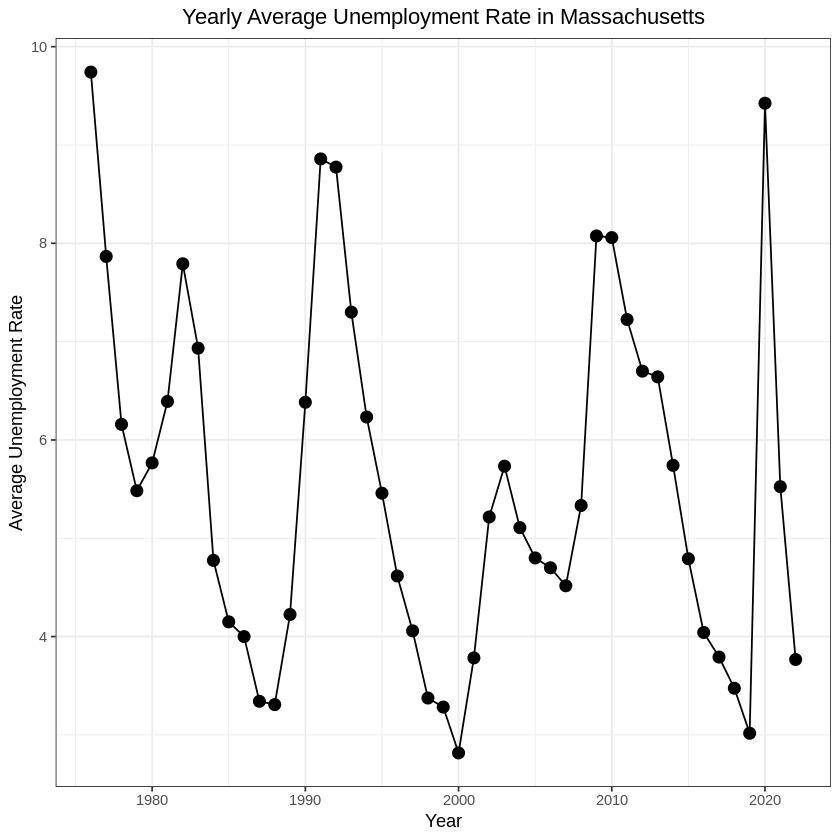

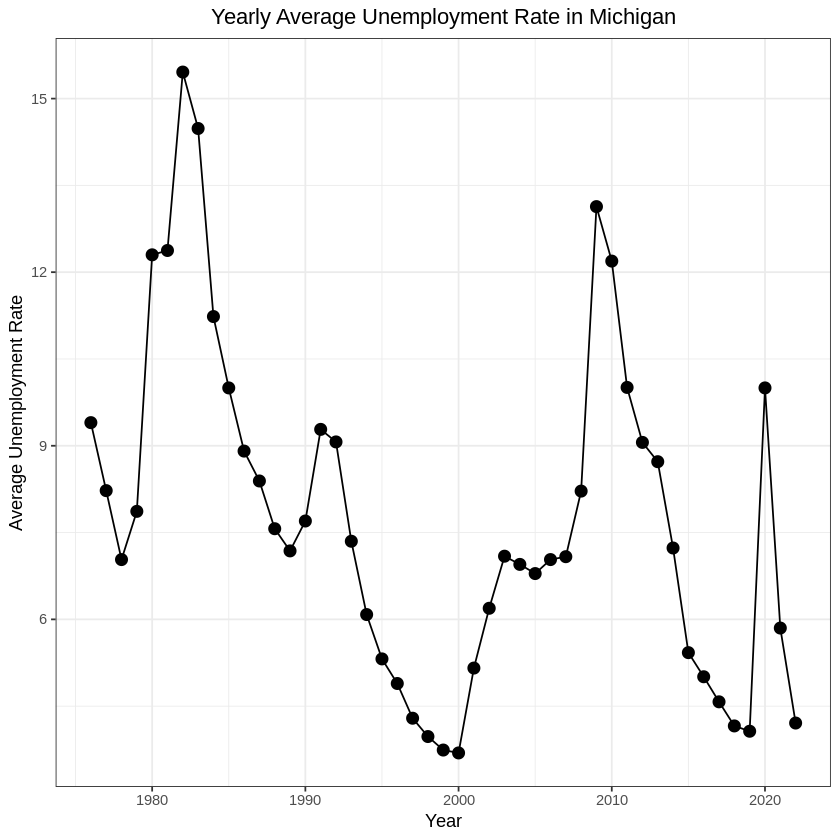

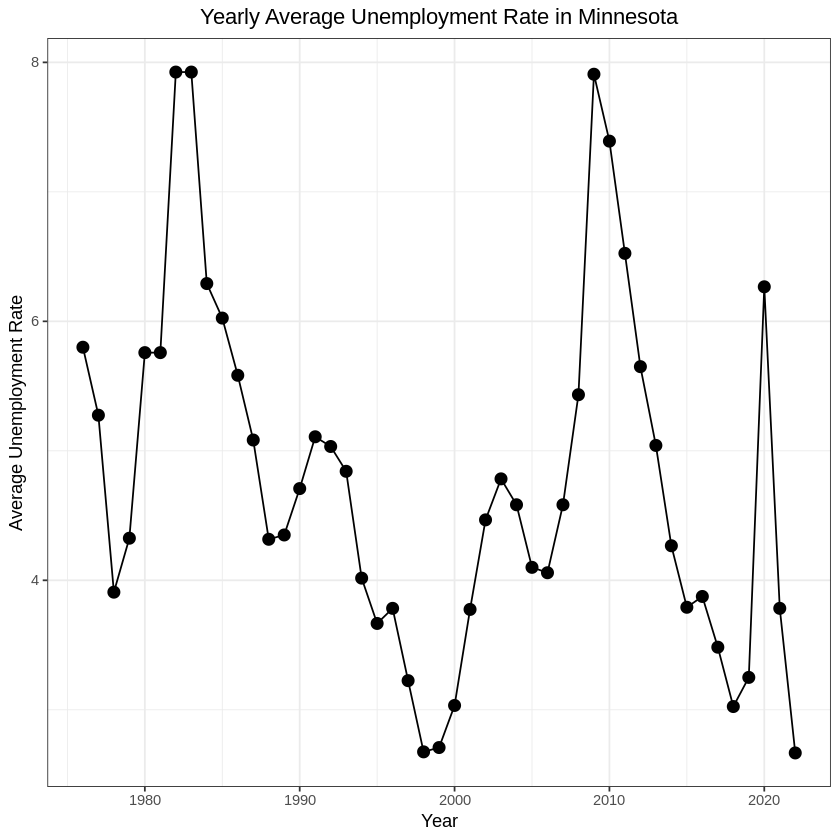

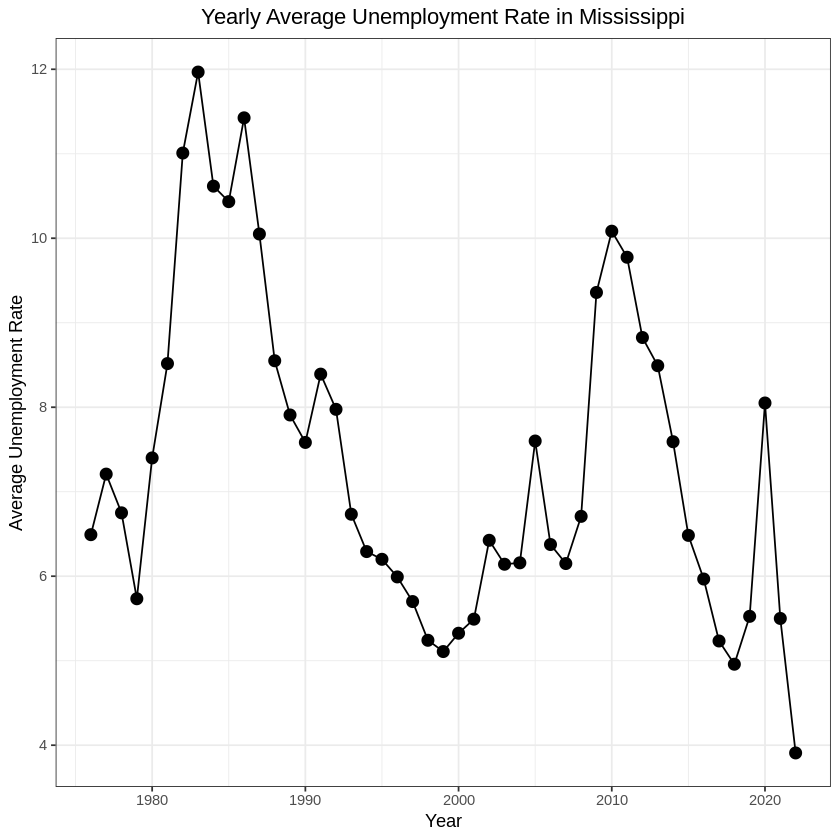

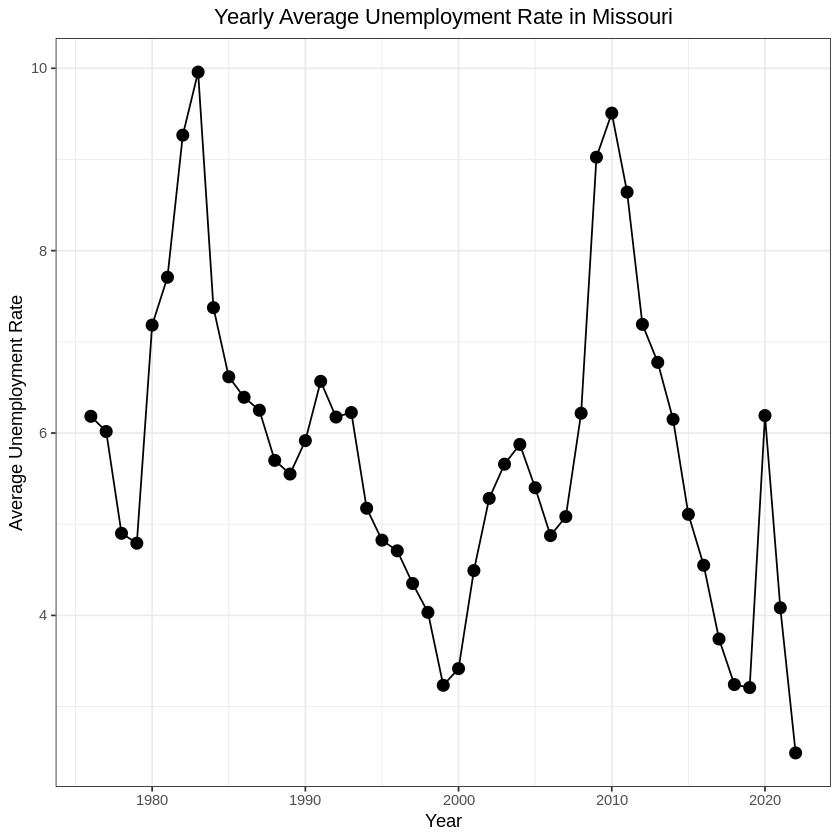

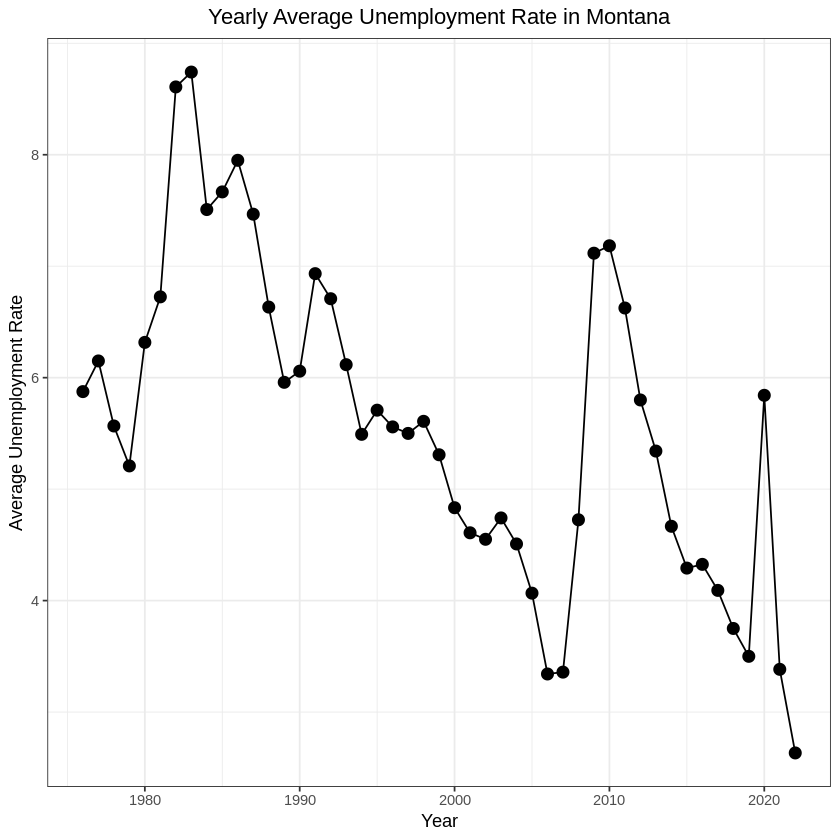

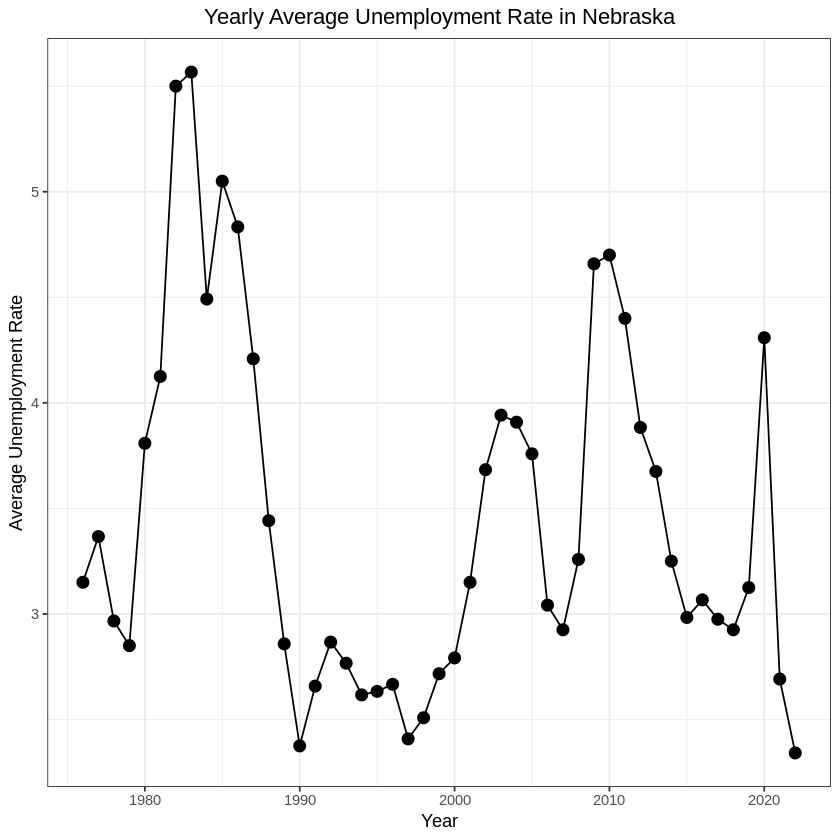

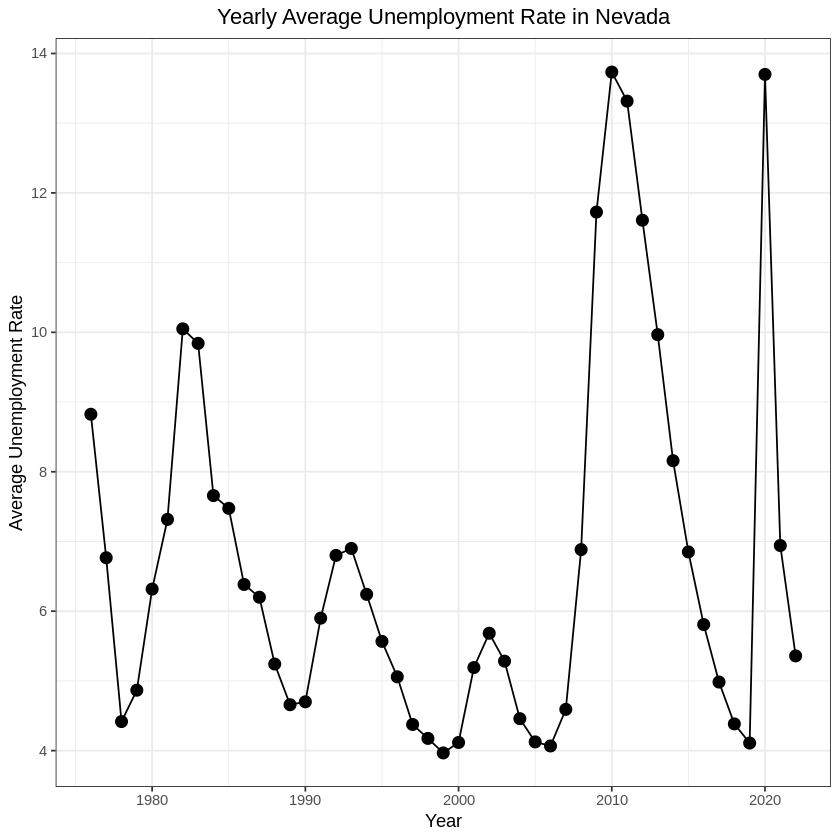

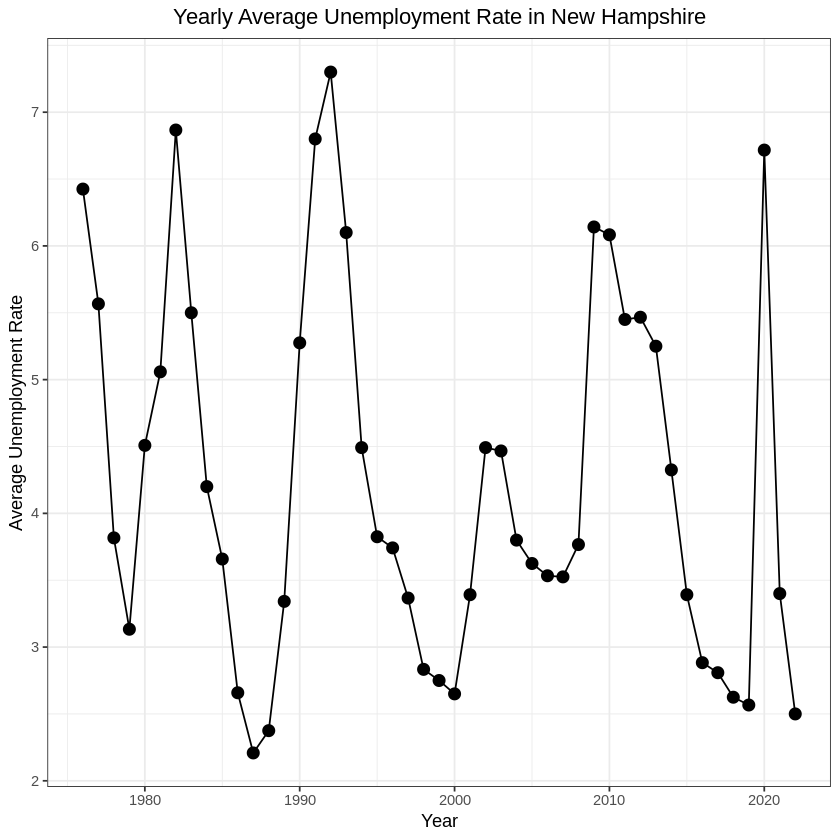

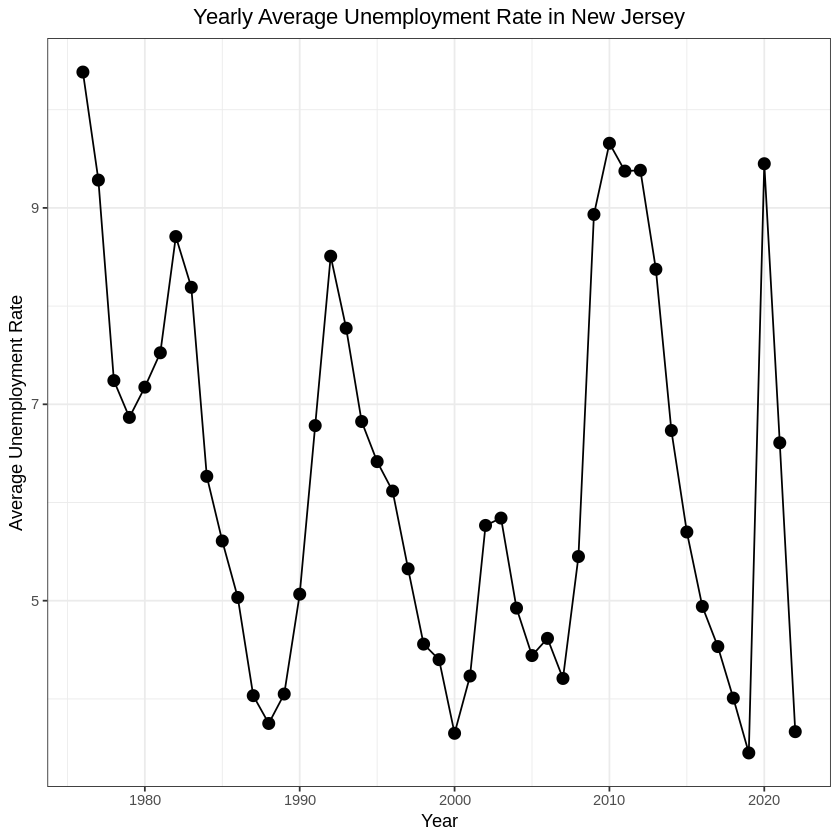

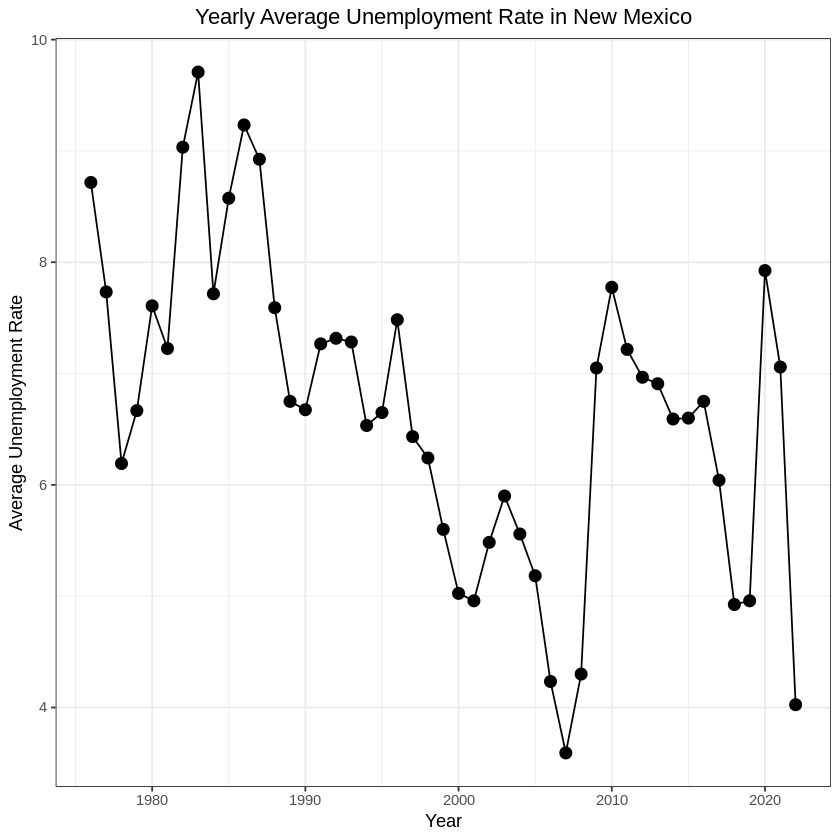

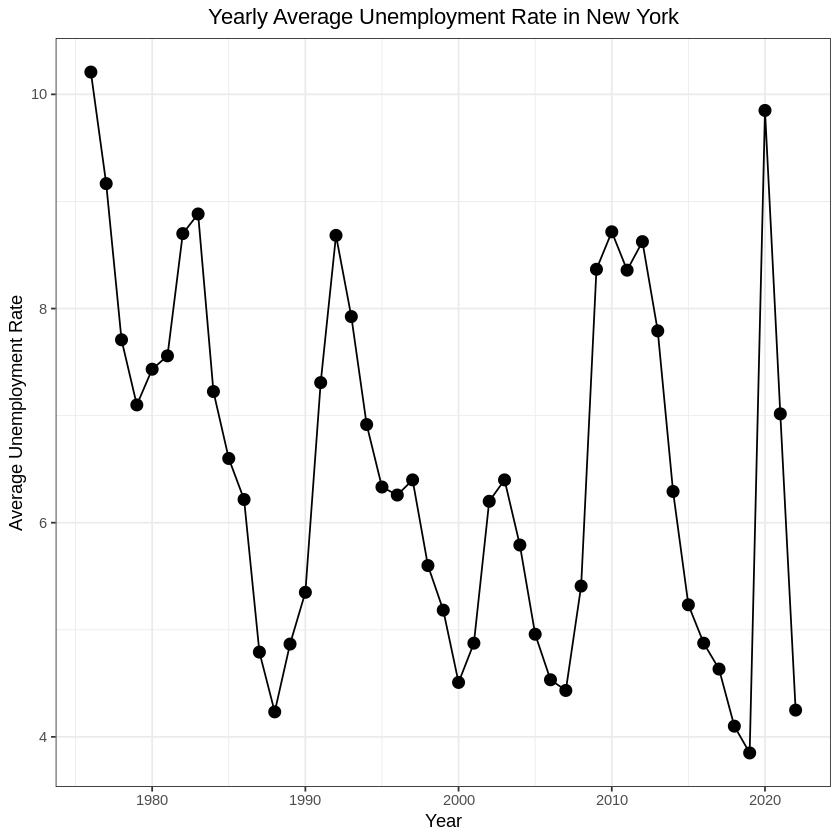

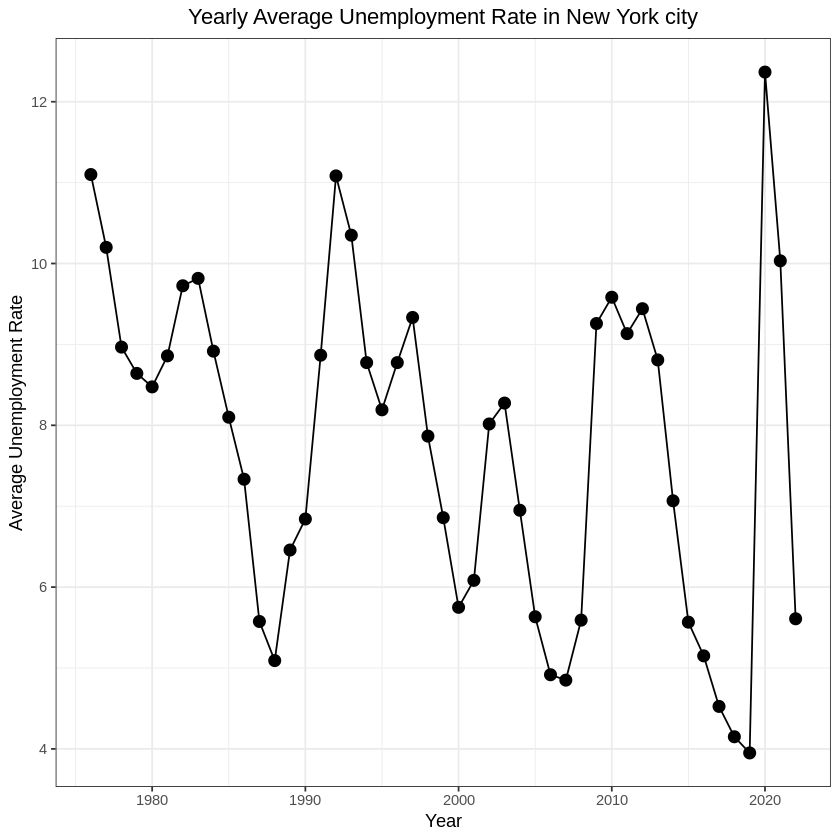

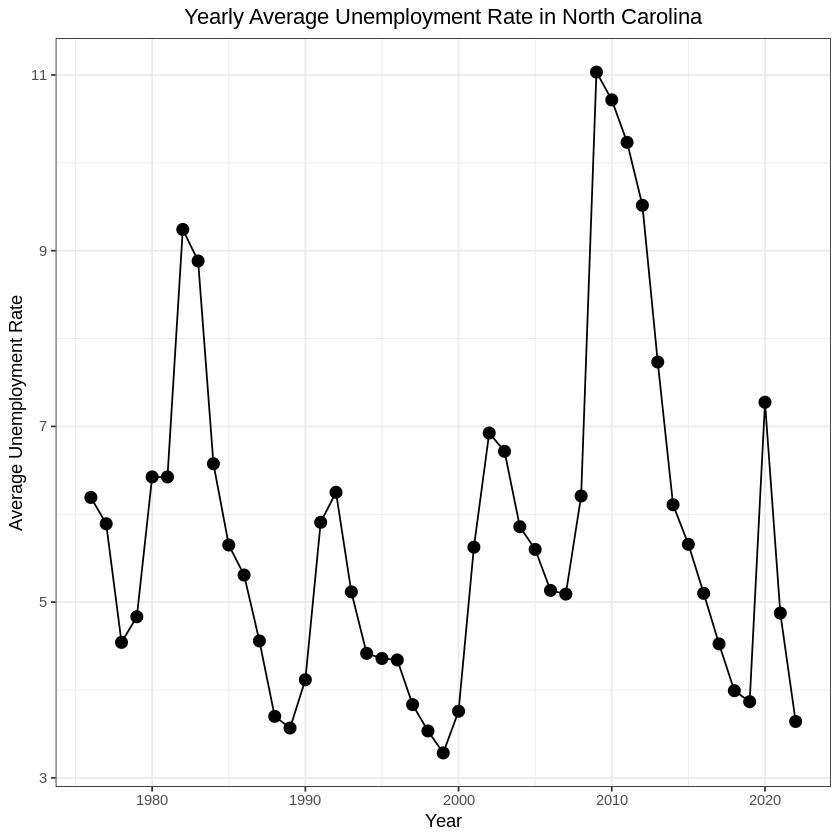

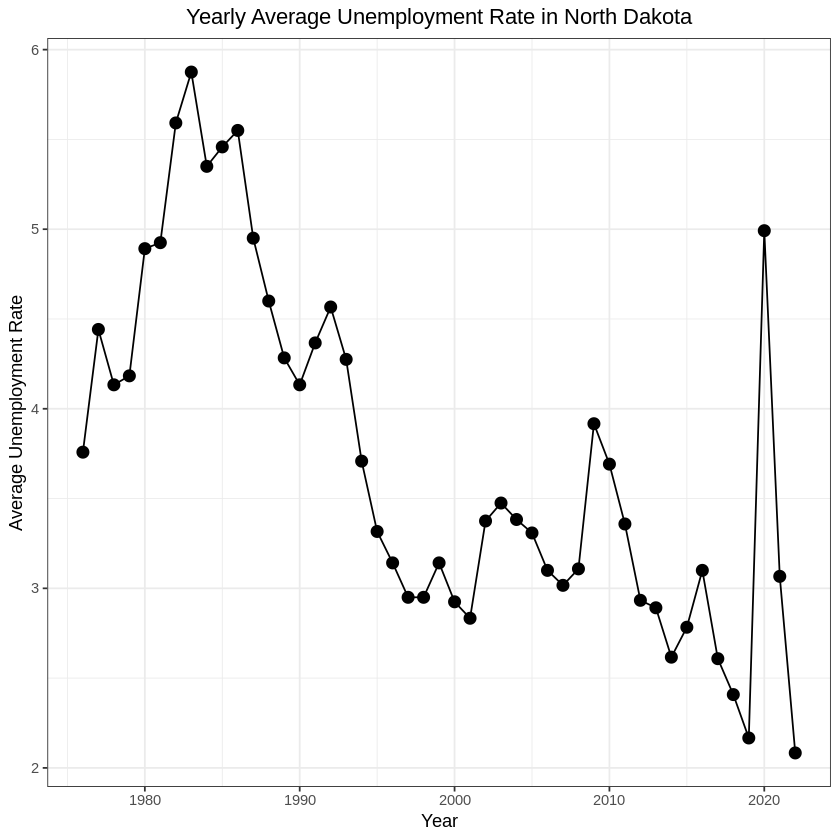

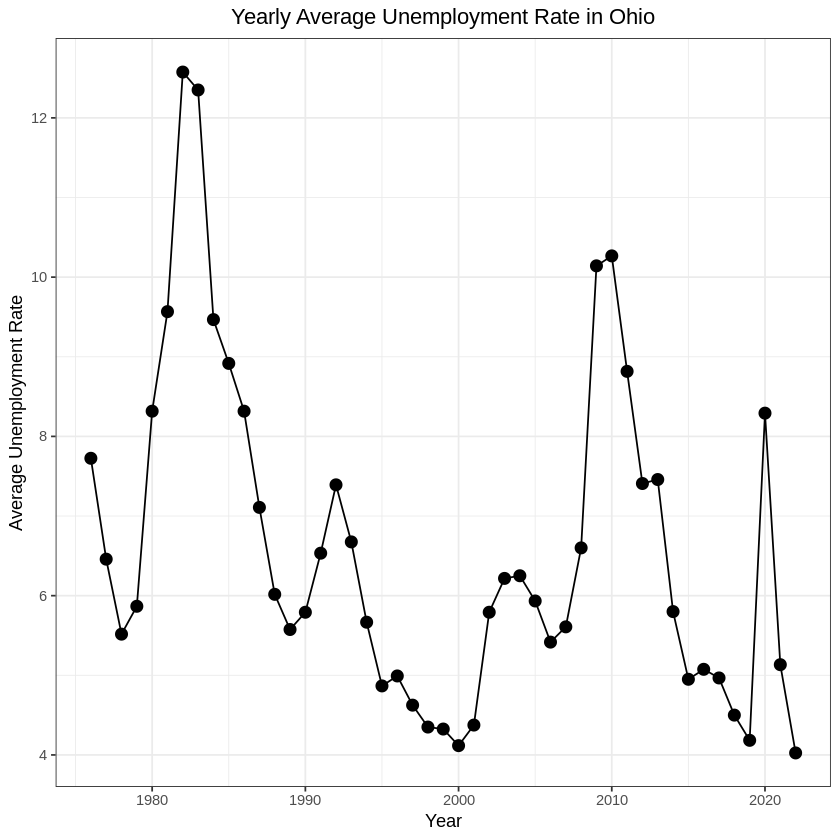

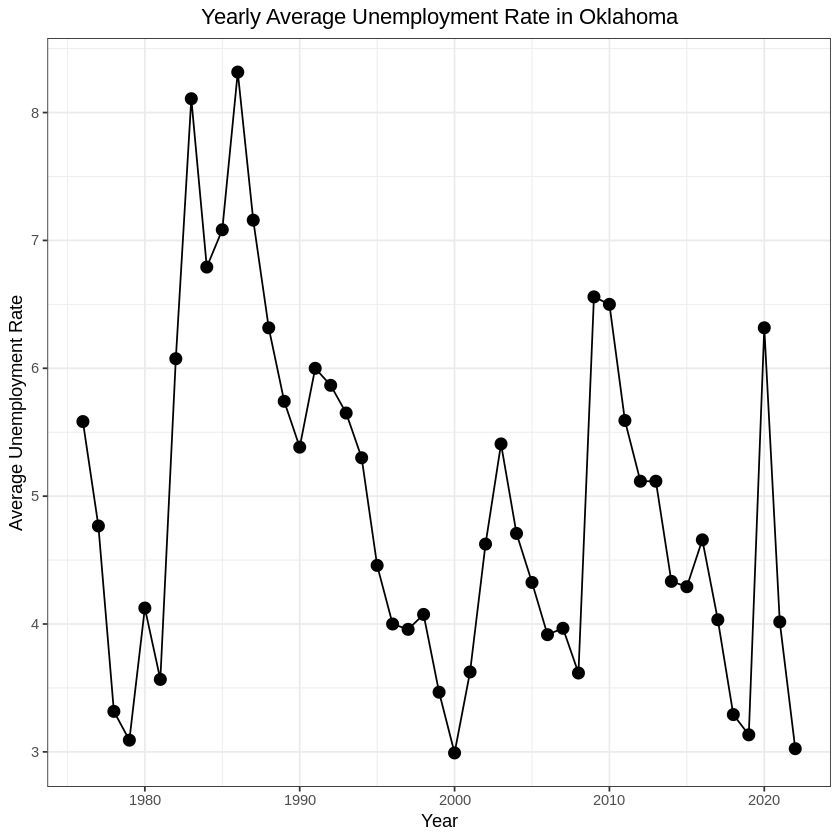

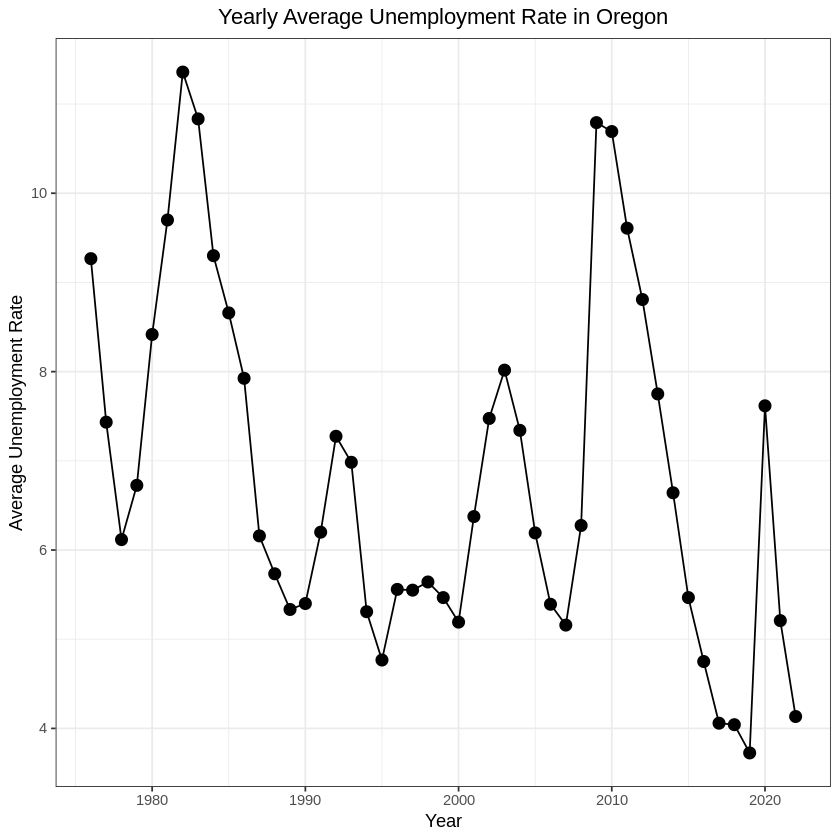

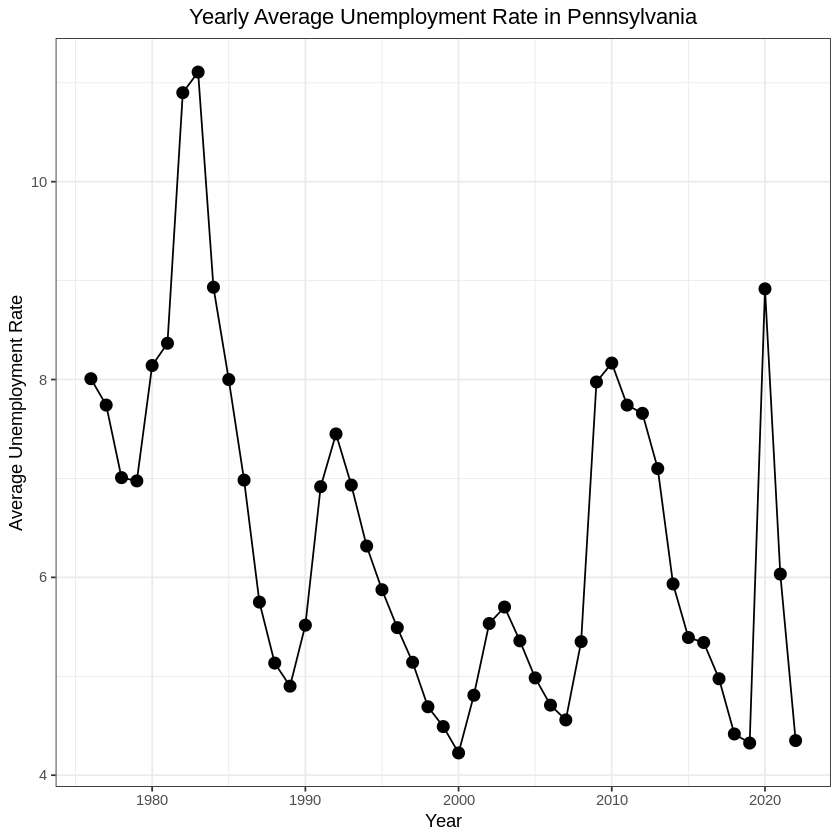

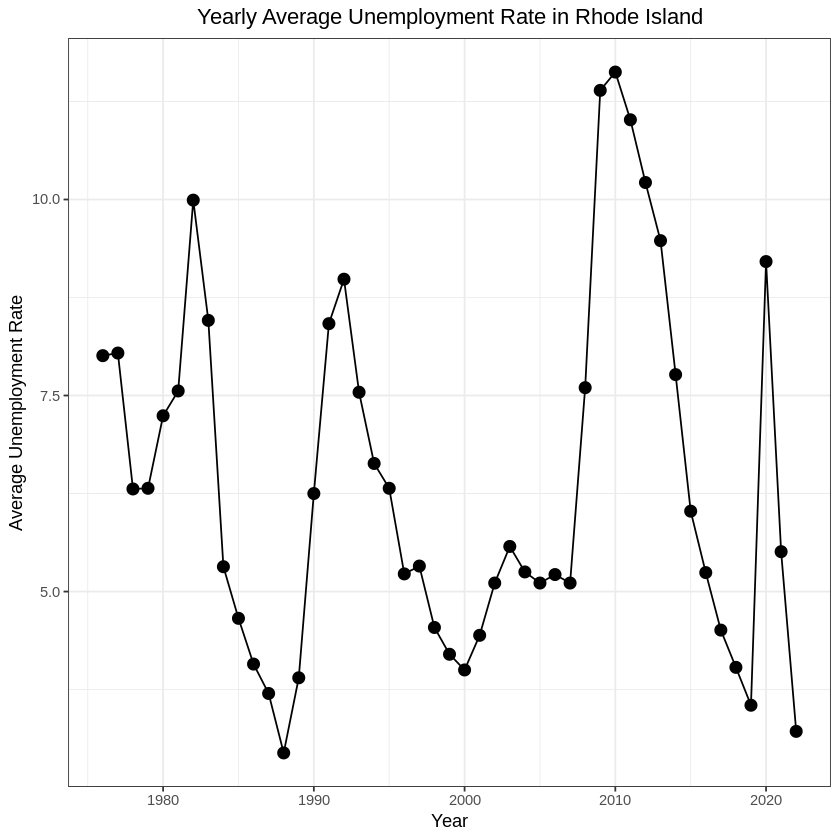

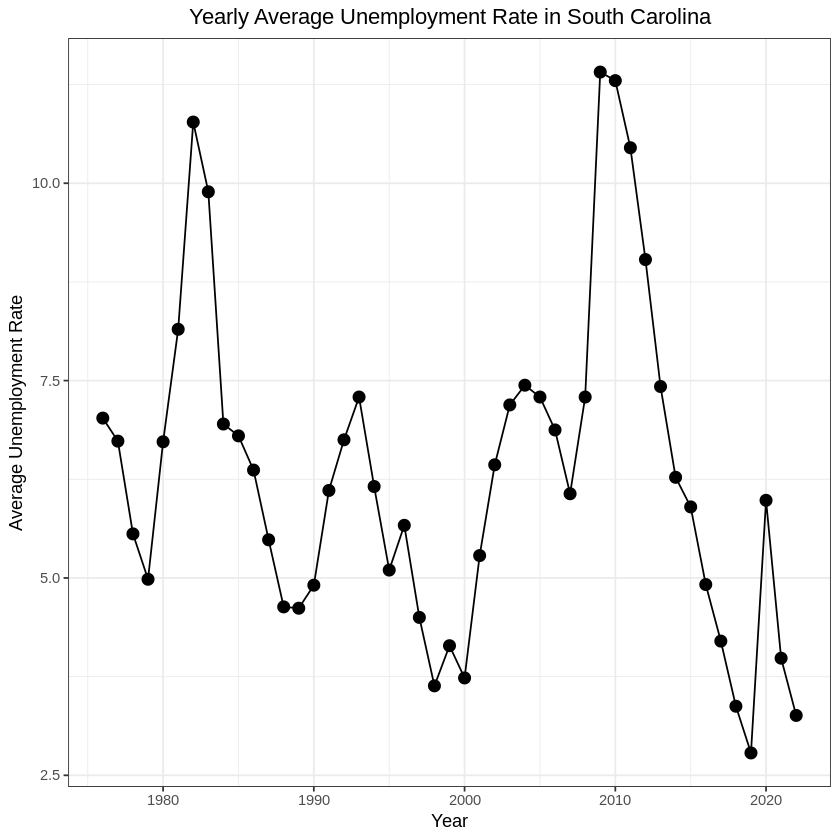

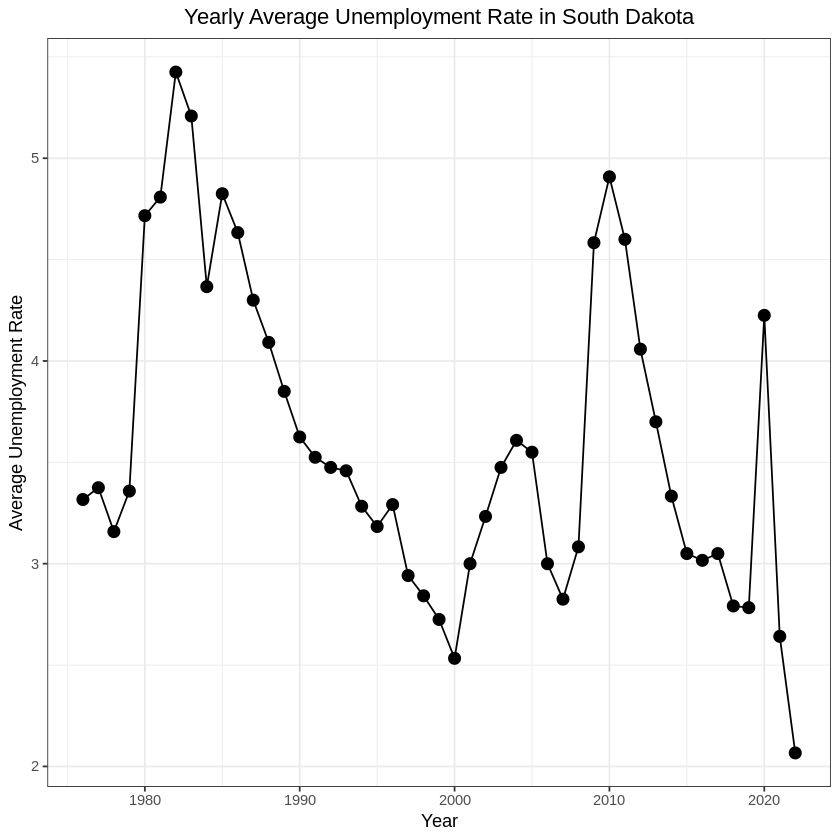

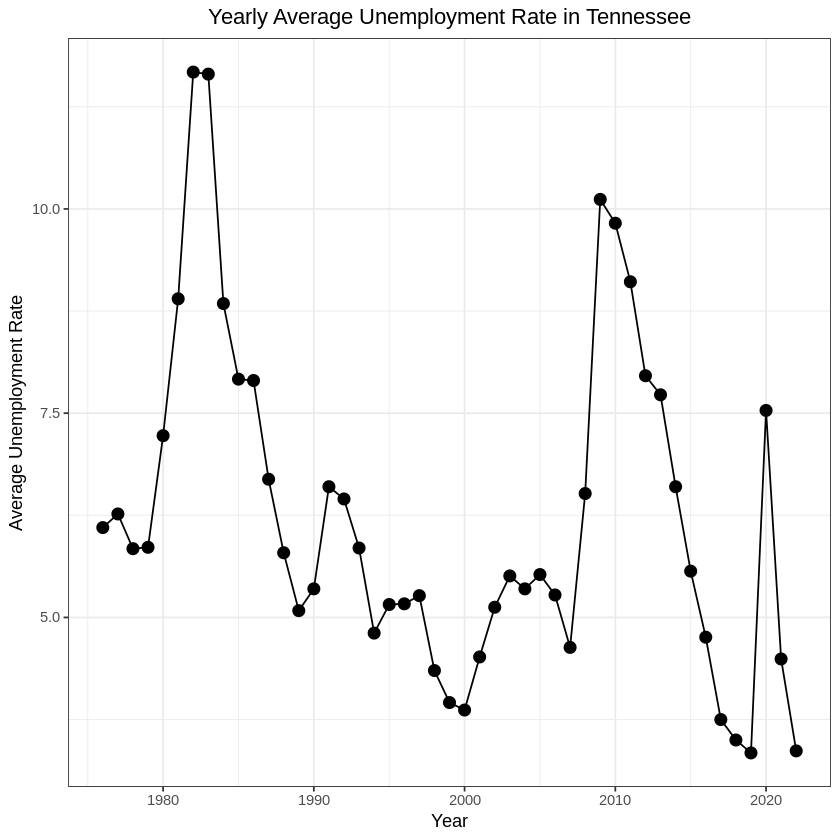

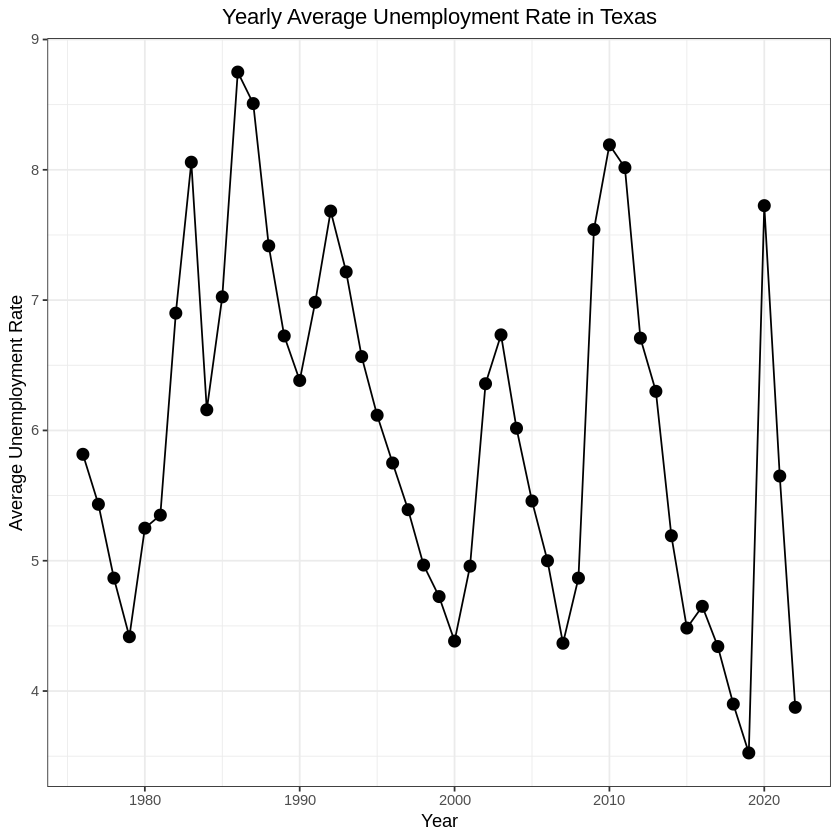

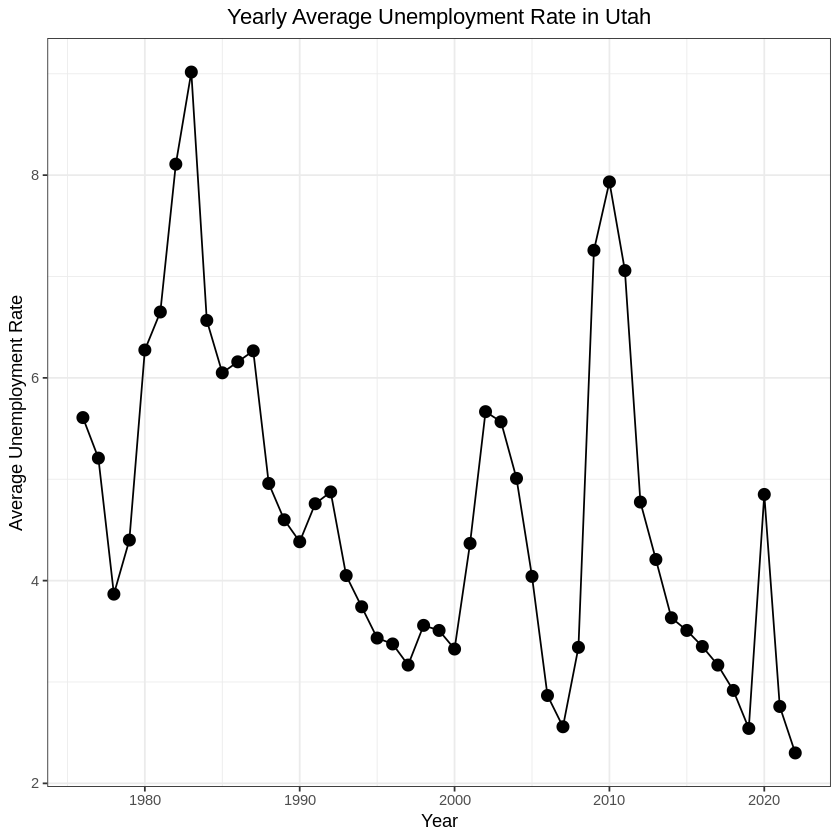

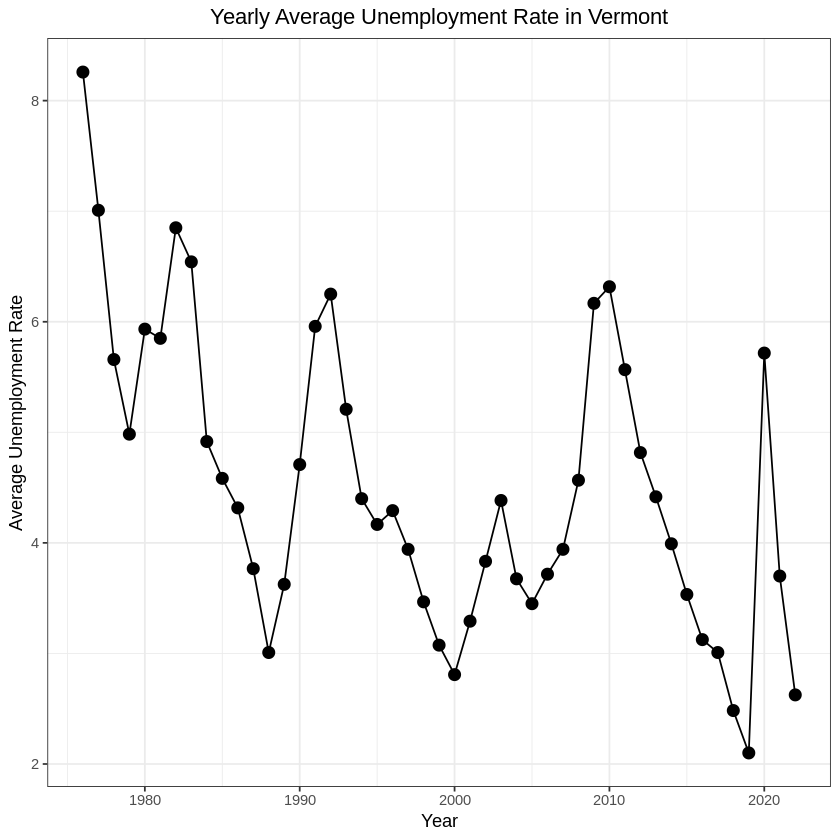

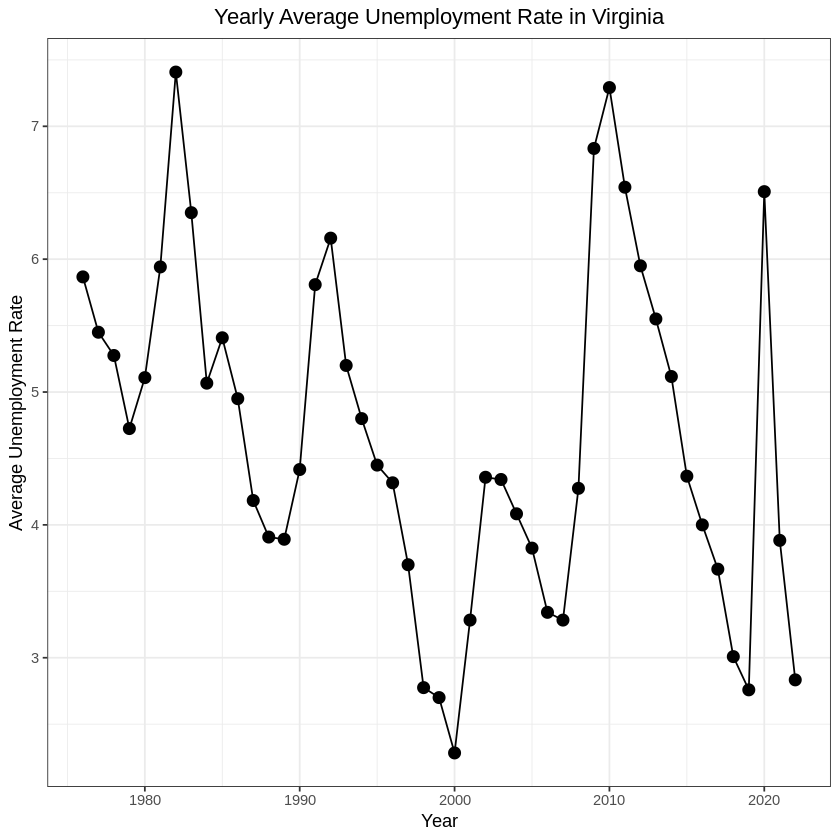

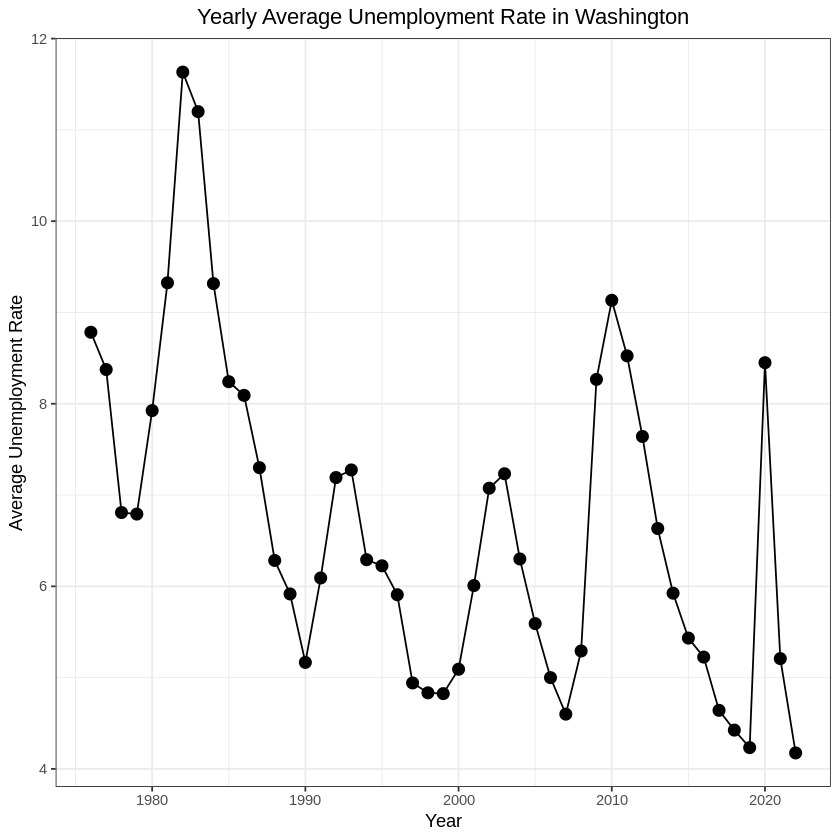

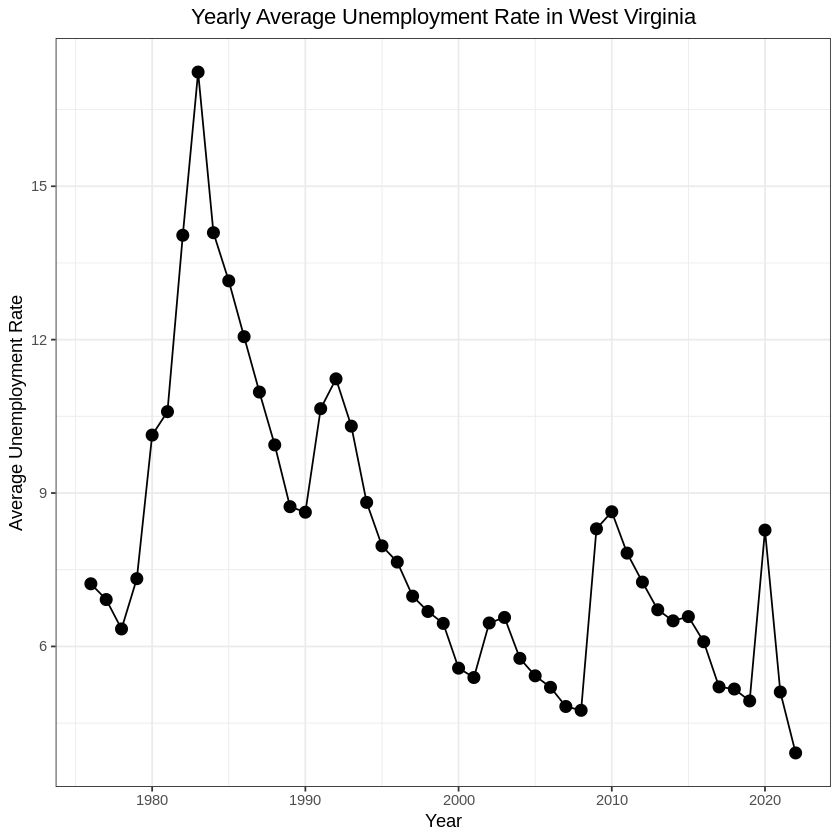

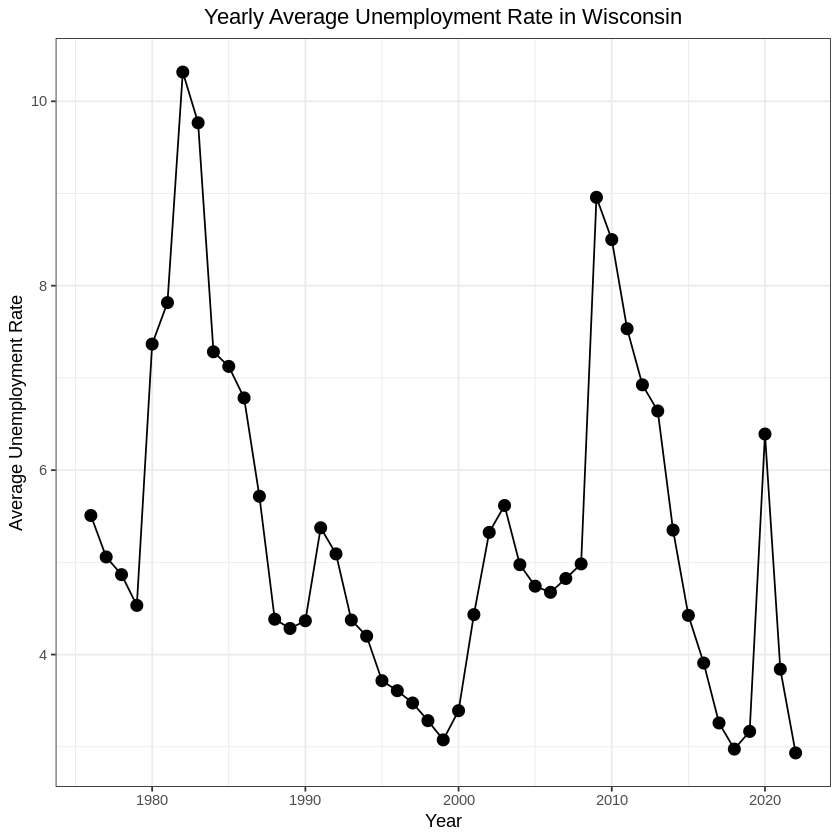

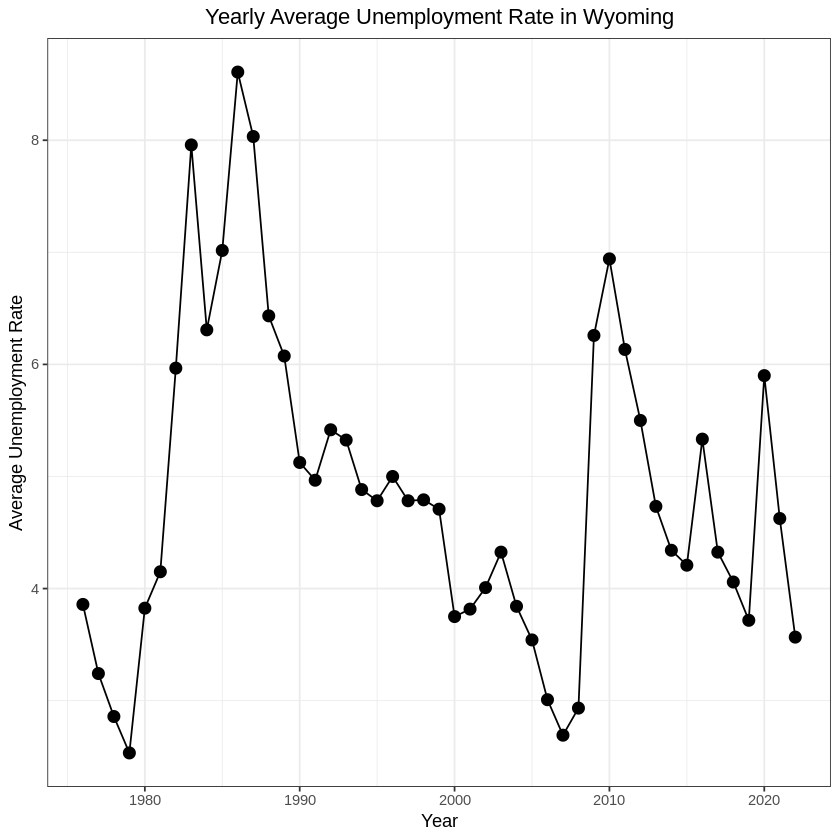

In [ ]:

# Function to create and display plots for each state
plot_state_unemployment <- function(state_name) {
  state_data <- df[df$`State/Area` == state_name, ]
  if(nrow(state_data) == 0){
    message(paste("No data found for", state_name))
    return() # Exit the function if no data is found
  }

  state_unemployment <- aggregate(`Percent (%) of Labor Force Unemployed in State/Area` ~ Year, data = state_data, FUN = mean)

  plot <- ggplot(state_unemployment, aes(x = Year, y = `Percent (%) of Labor Force Unemployed in State/Area`)) +
    geom_line() +
    geom_point(size = 3) +
    labs(x = "Year", y = "Average Unemployment Rate", title = paste("Yearly Average Unemployment Rate in", state_name)) +
    theme_bw() +
    theme(plot.title = element_text(hjust = 0.5)) # Center the title

  print(plot)
}

# Get unique state names
states <- unique(df$`State/Area`)

# Loop through each state and generate plots
for (state in states) {
  plot_state_unemployment(state)
}

Correlation between Unemployment Rate and Labor Force Size: 0.1174988 


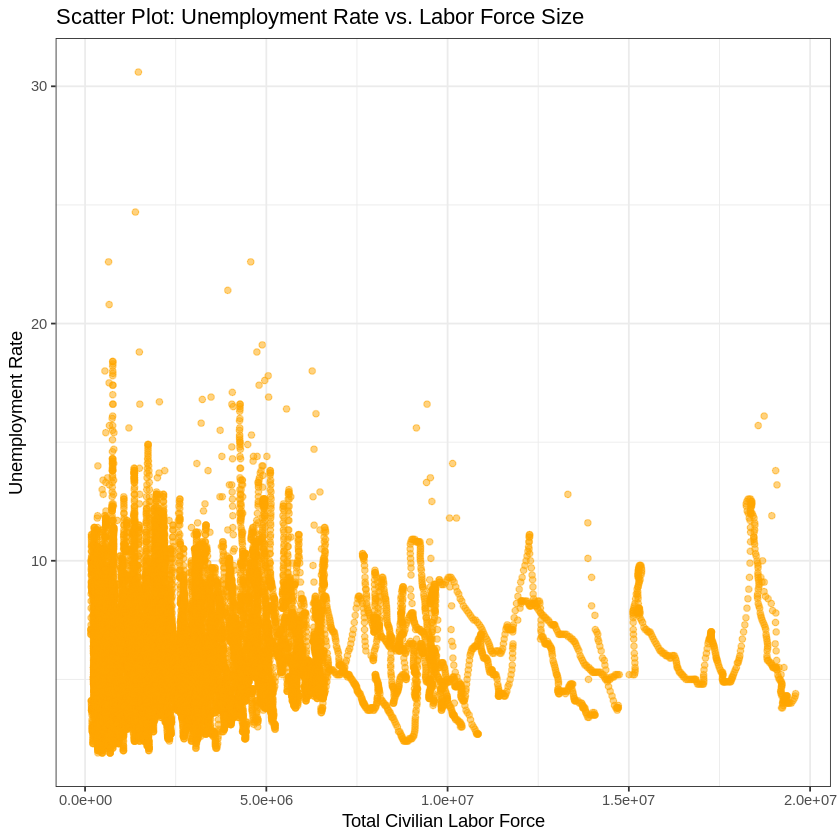

In [ ]:


# Calculate the correlation between unemployment rate and labor force size
correlation_labor_force <- cor(df$`Percent (%) of Labor Force Unemployed in State/Area`, df$`Total Civilian Labor Force in State/Area`, use = "complete.obs")
cat("Correlation between Unemployment Rate and Labor Force Size:", correlation_labor_force, "\n")

# Create a scatter plot
library(ggplot2)

ggplot(df, aes(x = `Total Civilian Labor Force in State/Area`, y = `Percent (%) of Labor Force Unemployed in State/Area`)) +
  geom_point(alpha = 0.5, color = "orange") +
  labs(x = "Total Civilian Labor Force", y = "Unemployment Rate", title = "Scatter Plot: Unemployment Rate vs. Labor Force Size") +
  theme_bw() # Use a black and white theme for better visualization